# Homework 04 - Q10

## LIBRARY

In [242]:
## Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


## FUNCTION

In [243]:
def univariate_numeric_variable(data, variable):
    """
    Generates a matrix of charts (2x2) for a numeric continuous variable.

    [1,1] Histogram
    [1,2] Violin Plot
    [2,1] Box plot
    [2,2] Box plot with points overlaid

    Above the charts, shows a table with the variable descriptive statistics.

    Parameters:
        data (pd.DataFrame): Database containing the variable.
        variable (str): Name of the variable to be analysed.

    Returns:
        None

    Usage example:
        >> data = pd.DataFrame({"example_variable": np.random.normal(loc=50, scale=10, size=100)})
        >>univariate_numeric_variable(data, "example_variable")
        
    """
    
    # Calculate descriptive statistics
    desc_stats = data[variable].describe().to_frame().T
    desc_stats = desc_stats.round(4)  # Limit to 4 decimal places

    # Configuration of subplots
    fig = plt.figure(figsize=(8, 6))
    fig.suptitle(f"Analysing: {variable}", fontsize=16, y=0.98)

    # Add table on the top
    ax_table = plt.subplot2grid((3, 2), (0, 0), colspan=2)
    ax_table.axis("off")
    table = ax_table.table(cellText=desc_stats.values,
                           colLabels=desc_stats.columns,
                           rowLabels=desc_stats.index,
                           cellLoc="center",
                           loc="center",
                           bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(desc_stats.columns))))

    # Add padding by scaling the table
    table.scale(1.2, 1.8)  # Adjust these values for horizontal/vertical padding

    # [1,1] Histogram
    ax1 = plt.subplot2grid((3, 2), (1, 0))
    sns.histplot(data[variable], kde=True, ax=ax1, color="skyblue")
    ax1.set_title("Histogram", fontsize=12)
    ax1.set_xlabel(variable)

    # [1,2] Violin Chart
    ax2 = plt.subplot2grid((3, 2), (1, 1), sharex=ax1)
    sns.violinplot(x=data[variable], ax=ax2, color="lightgreen")
    ax2.set_title("Violin Chart", fontsize=12)
    ax2.set_xlabel(variable)

    # [2,1] Box plot
    ax3 = plt.subplot2grid((3, 2), (2, 0), sharex=ax1)
    sns.boxplot(x=data[variable], ax=ax3, color="orange")
    ax3.set_title("Box plot", fontsize=12)
    ax3.set_xlabel(variable)

    # [2,2] Box plot with points overlaid
    ax4 = plt.subplot2grid((3, 2), (2, 1), sharex=ax1)
    sns.boxplot(x=data[variable], ax=ax4, color="lightcoral")
    sns.stripplot(x=data[variable], ax=ax4, color="black", alpha=0.5, jitter=True)
    ax4.set_title("Box plot with points", fontsize=12)
    ax4.set_xlabel(variable)

    # Final Adjustments
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [244]:
def univariate_categorical_variable(data, variable):
    """
    Analyse categorical variable.

    1. Returns transposed describe function in a table format.
    2. Returns a table with level frequency (including percentage and total).
    3. Plot a bar chart with frequency and show values on top.

    Parameters:
        data (pd.DataFrame): Database containing the variable.
        variable (str): Name of the variable to be analysed.

    Returns:
        None

    Usage example:
        >>> import pandas as pd
        >>> df = pd.DataFrame({'Caregory': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'A', 'B']})
        >>> univariate_categorical_variable(df, 'Caregory')
    """
    # Verify if variable is on the dataframe
    if variable not in data.columns:
        raise ValueError(f"Variable '{variable}' is not in the DataFrame.")

    # 1. Transposed and formated describe
    describe_table = data[variable].describe().to_frame()
    describe_table = describe_table.T
    describe_table.index = [variable]

    # Show formated table
    print("Categorical variable describe:")
    display(describe_table)

    # 2. Frequency of each level (percentage and total)
    frequency_table = data[variable].value_counts().reset_index()
    frequency_table.columns = [variable, 'Frequency']
    frequency_table['Percentage (%)'] = (frequency_table['Frequency'] / len(data) * 100).round(2)

    # Add line for total
    total_row = pd.DataFrame({
        variable: ['Total'],
        'Frequency': [frequency_table['Frequency'].sum()],
        'Percentage (%)': [100.0]
    })
    frequency_table = pd.concat([frequency_table, total_row], ignore_index=True)

    # Show formated table
    print("Frequency table of categorical variable (with percentage and total):")
    display(frequency_table)

    # 3. Frequency bar chart
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=variable, y='Frequency', data=frequency_table[:-1], errorbar=None)

    # Add lables on top of the bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    # Configure chart
    plt.title(f'Frequency chart: {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [245]:
# Function: numeric_variable_analysis_percentile: Percentile analysis for one numeric variable.
def numeric_variable_analysis_percentile(data, x, y, q=10, chart='none'):
    """
    Sort variable x, divide in percentile and summarize.

    Paameters:
        data (pd.DataFrame): Database containing the variable.
        x (str): Name of the independent varaible.
        y (str): Name of dependent variable.
        q (int): Number of percentile (default: 10).
        chart (str): Chart options: 'p', 'logit', 'both', 'none' (default: 'none').

    Returns:
        pd.DataFrame: DataFrame with summarize statistics by percentile, incluindo:
                      - Percentile
                      - n (number of rows)
                      - Min x
                      - Max x
                      - p (mean y)
                      - logit p

    Usage example:
        >> data = pd.DataFrame({'x': np.random.uniform(0, 100, 1000), 
        'y': np.random.randint(0, 2, 1000)})
        >> result = numeric_variable_analysis_percentile(data, 'x', 'y', q=10, chart='both')
        >> print(result)
    """
    # Certify that y varaible is in a numeric format
    data[y] = pd.to_numeric(data[y], errors='coerce')

    # Sort dataframe by x variable
    data = data.sort_values(by=x).reset_index(drop=True)

    # Create percentiles
    data['percentile'] = pd.qcut(data[x], q=q, labels=[str(i) for i in range(1, q + 1)])

    # Summaraize statistics per percentile
    summary = data.groupby('percentile', observed=False).agg(
        n=(x, 'count'),
        min_x=(x, 'min'),
        max_x=(x, 'max'),
        p=(y, 'mean')
    ).reset_index()

    # Calculate logit p
    summary['logit_p'] = np.log(summary['p'] / (1 - summary['p']))

    # Adjust to deal where p is 0 or 1
    epsilon = 1e-10  # smal value to adjust 0 e 1
    summary['logit_p'] = np.log(np.clip(summary['p'], epsilon, 1 - epsilon) / 
                                 (1 - np.clip(summary['p'], epsilon, 1 - epsilon)))


    # Chart option
    if chart in ['p', 'logit', 'both']:
        plt.figure(figsize=(8, 6))

        if chart == 'p':
            plt.scatter(summary['percentile'], summary['p'], color='blue')
            plt.title('Percentile chart x p')
            plt.xlabel('Percentile')
            plt.ylabel('p (average of y)')
            plt.grid(True)
            plt.show()

        elif chart == 'logit':
            plt.scatter(summary['percentile'], summary['logit_p'], color='red')
            plt.title('Percentile chart x logit p')
            plt.xlabel('Percentile')
            plt.ylabel('logit p')
            plt.grid(True)
            plt.show()

        elif chart == 'both':
            # Chart side-by-side
            fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

            # Percentile Chart x p
            axes[0].scatter(summary['percentile'], summary['p'], color='blue')
            axes[0].set_title('Percentile x p')
            axes[0].set_xlabel('Percentile')
            axes[0].set_ylabel('p (average of y)')
            axes[0].grid(True)

            # Percentile Chart x logit p
            axes[1].scatter(summary['percentile'], summary['logit_p'], color='red')
            axes[1].set_title('Percentile x logit p')
            axes[1].set_xlabel('Percentile')
            axes[1].set_ylabel('logit p')
            axes[1].grid(True)

            plt.tight_layout()
            plt.show()

    return summary

In [246]:
def assign_percentile_group(value, percentile_df):
    """
    Assign percentile group based on min/max ranges from percentile table
    """
    for _, row in percentile_df.iterrows():
        if row['min_x'] <= value <= row['max_x']:
            return row['percentile']
    return None

In [247]:
def bivariate_categorical_analysis(data, x, y):
    result = data.groupby(x)[y].agg([
        ('Frequency', 'count'),
        ('Probability', lambda x: x.mean().round(4)), 
        ]).reset_index()

    result['Percentage (%)'] = (result['Frequency'] / len(data) * 100).round(2)

    return result

## IMPORT DATA

In [248]:
df = pd.read_csv("../data/bank.csv", sep=";")

# df.info()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## EXPLORATORY DATA ANALYSIS (EDA)

Checking for missing values, there are no missing values on any of the variables.

In [249]:
# check missing values in the variables
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [250]:
# Check percentage of missing values for each variable
df.isna().sum()/df.shape[0] * 100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

### Variable: Age

asymmetric distribution to the right, Median < Mean .
Most frequent ages are around 30 to 40 years old.
Minimum and maximum ages are ok with in range for adults, considering adult as a person 18+ years old.

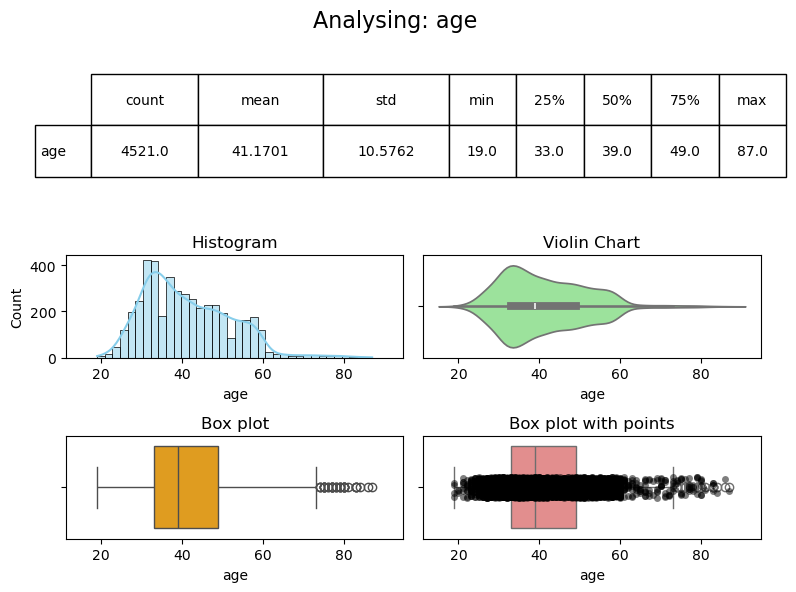

In [251]:
univariate_numeric_variable(df, 'age')

### Variable: Job

Categorical variable with categories not equally distributed.


Notes:
- Might need to group the categories with smalled frequencies so the model can better generalize.

Categorical variable describe:


,count,unique,top,freq
job,4521,12,management,969


Frequency table of categorical variable (with percentage and total):


,job,Frequency,Percentage (%)
0,management,969,21.43
1,blue-collar,946,20.92
2,technician,768,16.99
3,admin.,478,10.57
4,services,417,9.22
5,retired,230,5.09
6,self-employed,183,4.05
7,entrepreneur,168,3.72
8,unemployed,128,2.83
9,housemaid,112,2.48


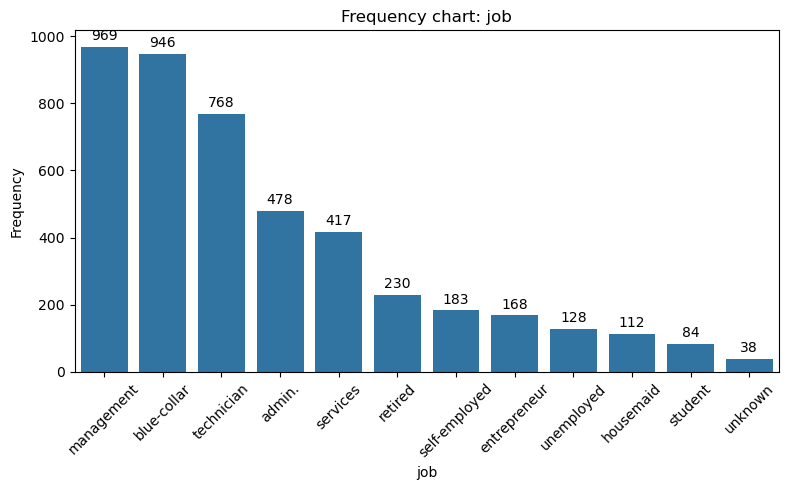

In [252]:
univariate_categorical_variable(df, 'job')

### Variable: Marital

Categorical variable with categories not equally distributed.
Married level represents ~62% of the dataset.




Categorical variable describe:


,count,unique,top,freq
marital,4521,3,married,2797


Frequency table of categorical variable (with percentage and total):


,marital,Frequency,Percentage (%)
0,married,2797,61.87
1,single,1196,26.45
2,divorced,528,11.68
3,Total,4521,100.00


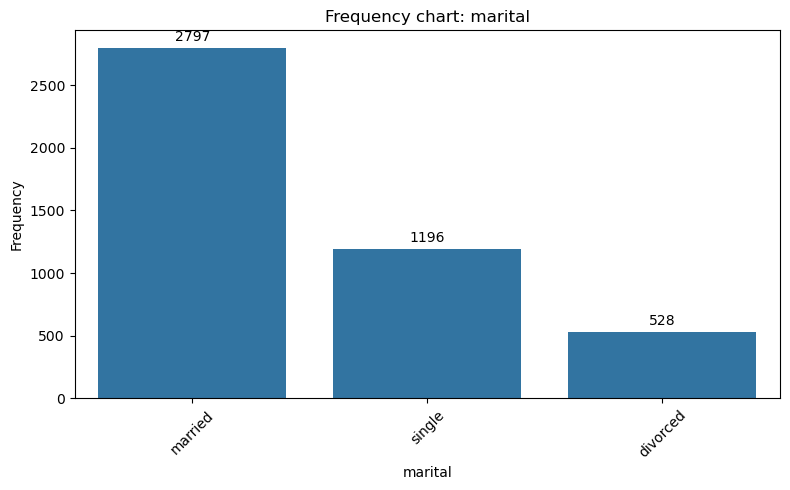

In [253]:
univariate_categorical_variable(df, 'marital')

### Variable: Education

Categorical variable.
51% of the dataset has secondary level of education.


Notes:
- Might need to group the categories with smalled frequencies so the model can better generalize.
- Primary + Unknown are good choices to group together.

Categorical variable describe:


,count,unique,top,freq
education,4521,4,secondary,2306


Frequency table of categorical variable (with percentage and total):


,education,Frequency,Percentage (%)
0,secondary,2306,51.01
1,tertiary,1350,29.86
2,primary,678,15.00
3,unknown,187,4.14
4,Total,4521,100.00


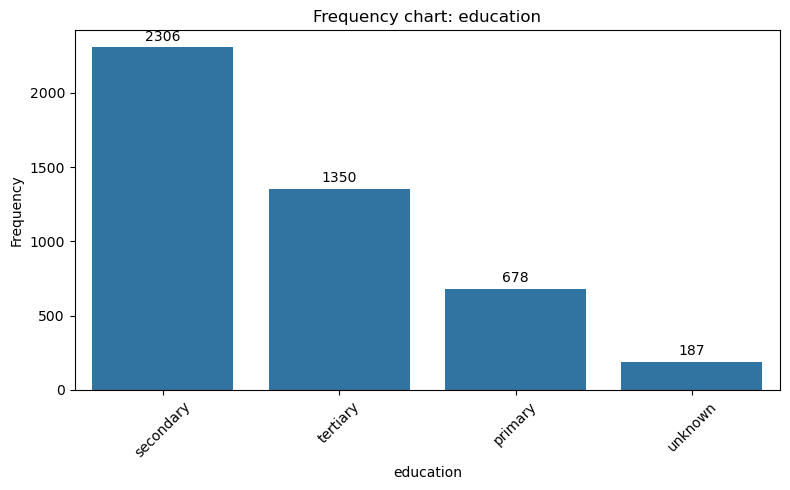

In [254]:
univariate_categorical_variable(df, 'education')

### Variable: Default

Binary varaible where 98% of it's value is no.

 
Notes:
- Might not be relevant to the model?

Categorical variable describe:


,count,unique,top,freq
default,4521,2,no,4445


Frequency table of categorical variable (with percentage and total):


,default,Frequency,Percentage (%)
0,no,4445,98.32
1,yes,76,1.68
2,Total,4521,100.00


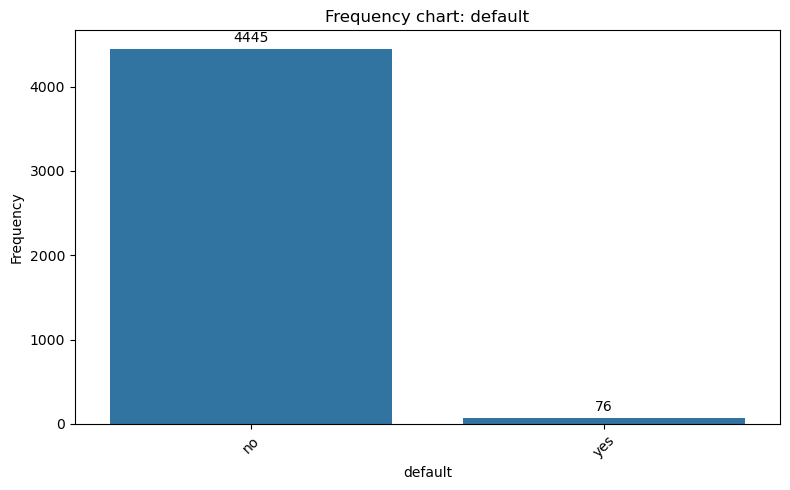

In [255]:
univariate_categorical_variable(df, 'default')

### Variable: Balance

asymmetric to the right, Median < Mean.


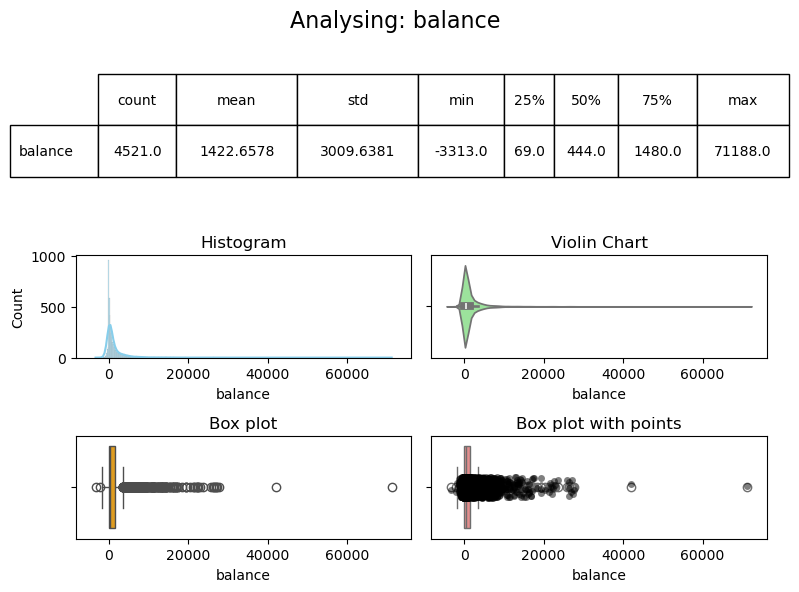

In [256]:
univariate_numeric_variable(df, 'balance')

### Variable: Housing

Categorical variable with a good distribution between yes/no.

Categorical variable describe:


,count,unique,top,freq
housing,4521,2,yes,2559


Frequency table of categorical variable (with percentage and total):


,housing,Frequency,Percentage (%)
0,yes,2559,56.6
1,no,1962,43.4
2,Total,4521,100.0


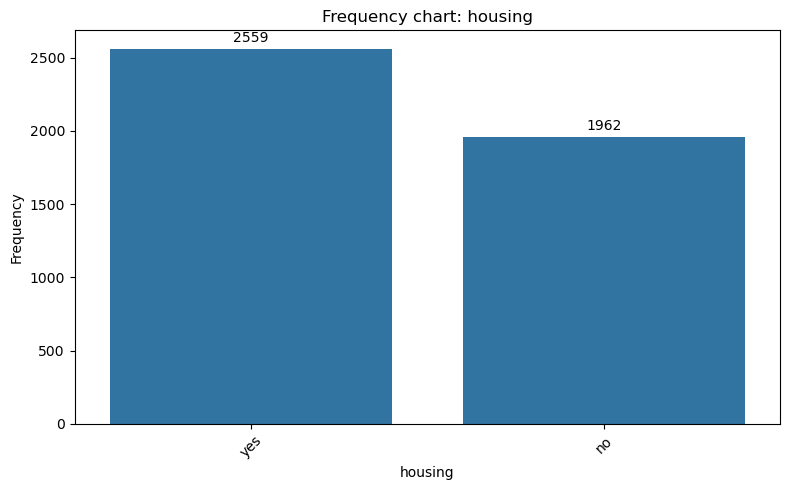

In [257]:
univariate_categorical_variable(df, 'housing')

### Variable: Loan

Categorical variable describe:


,count,unique,top,freq
loan,4521,2,no,3830


Frequency table of categorical variable (with percentage and total):


,loan,Frequency,Percentage (%)
0,no,3830,84.72
1,yes,691,15.28
2,Total,4521,100.00


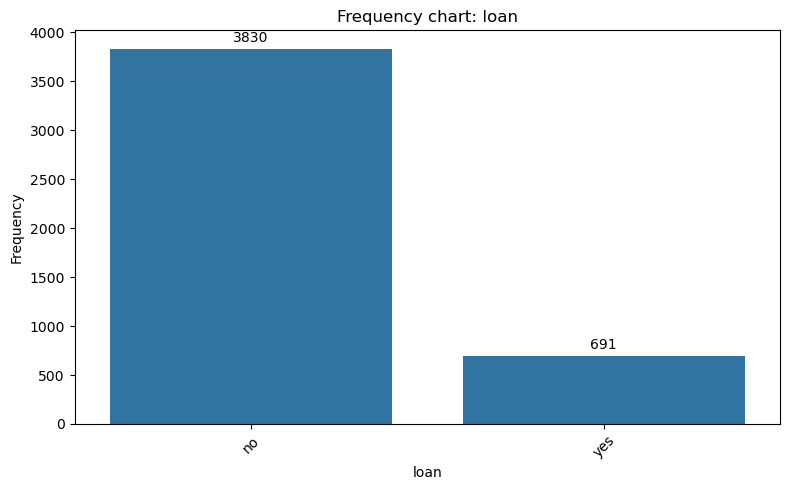

In [258]:
univariate_categorical_variable(df, 'loan')

### Variable: Contact

Categorical variable describe:


,count,unique,top,freq
contact,4521,3,cellular,2896


Frequency table of categorical variable (with percentage and total):


,contact,Frequency,Percentage (%)
0,cellular,2896,64.06
1,unknown,1324,29.29
2,telephone,301,6.66
3,Total,4521,100.00


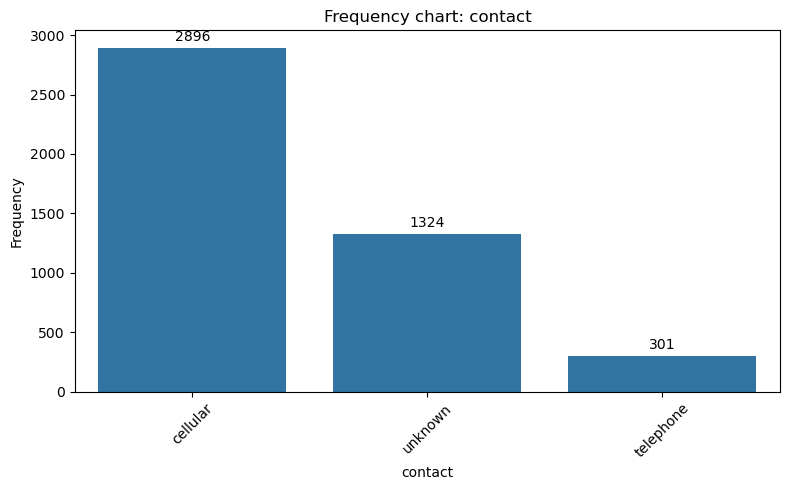

In [259]:
univariate_categorical_variable(df, 'contact')

### Variable: Day

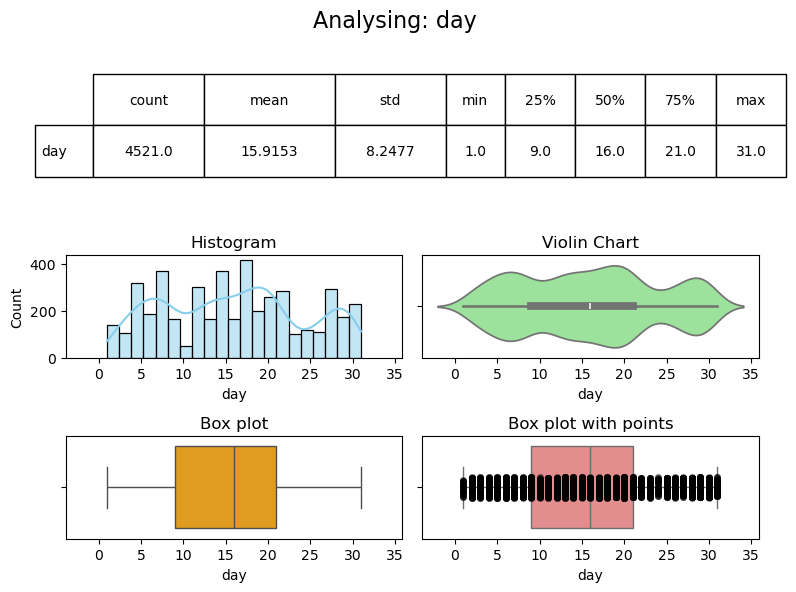

In [260]:
univariate_numeric_variable(df, 'day')

### Variable: Month

Note that the last month of contact seems to be May on 1 thrid of the data.
To not lose objectivity, let's think of a grouping that would make sense.

Categorical variable describe:


,count,unique,top,freq
month,4521,12,may,1398


Frequency table of categorical variable (with percentage and total):


,month,Frequency,Percentage (%)
0,may,1398,30.92
1,jul,706,15.62
2,aug,633,14.00
3,jun,531,11.75
4,nov,389,8.60
5,apr,293,6.48
6,feb,222,4.91
7,jan,148,3.27
8,oct,80,1.77
9,sep,52,1.15


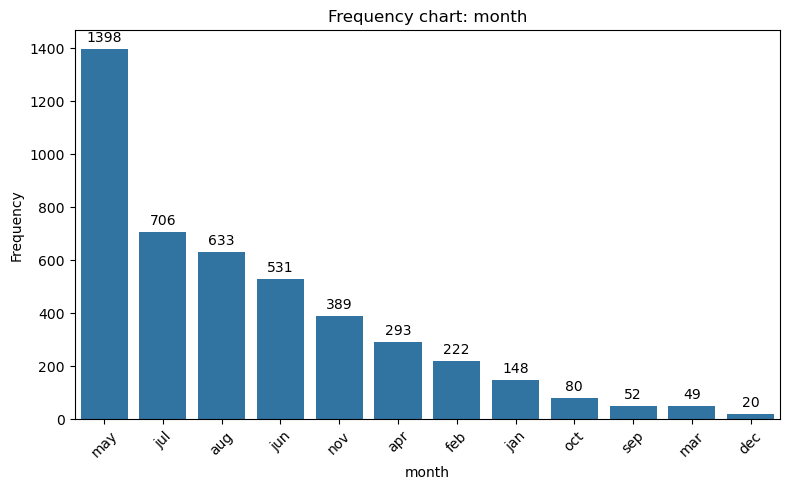

In [261]:
univariate_categorical_variable(df, 'month')

### Variable: Duration

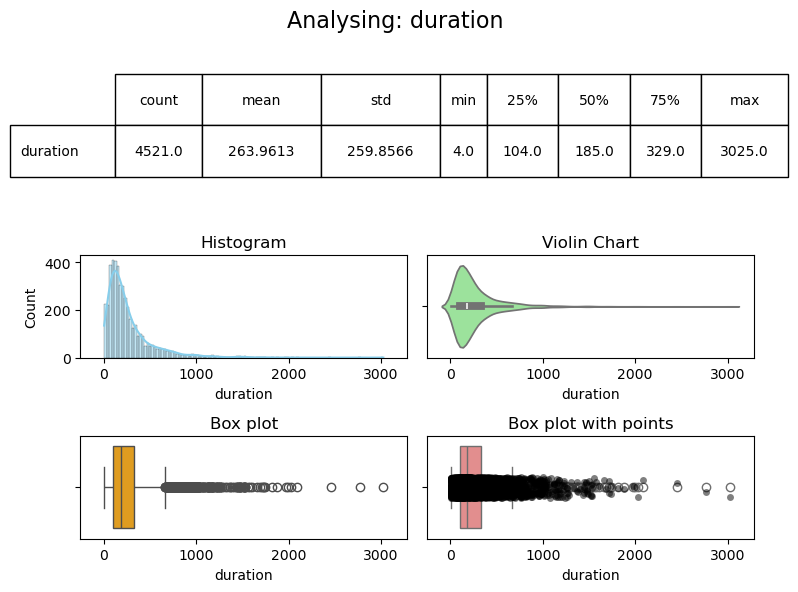

In [262]:
univariate_numeric_variable(df, 'duration')

### Variable: Campaign

Varaible is asymmetric to the right, Median < Mean.
Note that 75% of our data goes up to 3 campaigns, it makes some sense to categorize. 
Let's try some configuration that would give us some similar frequency ans less rare events.


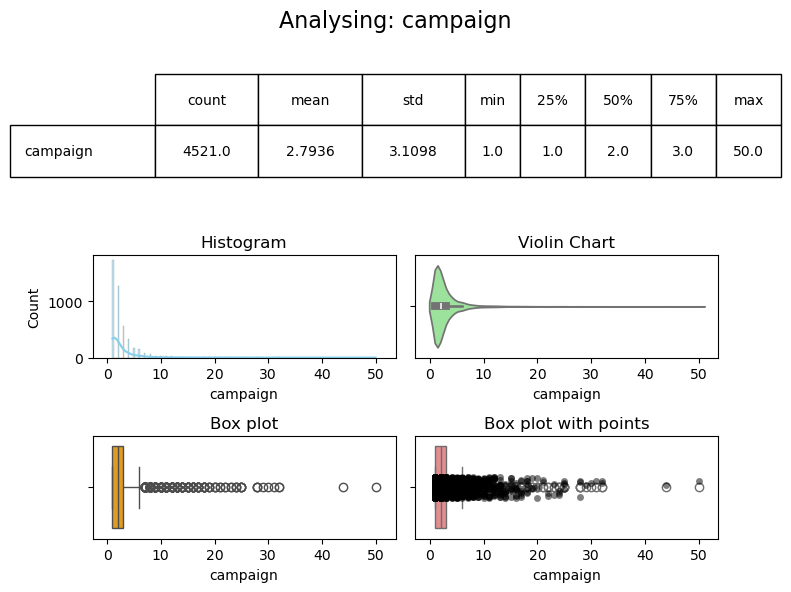

In [263]:
univariate_numeric_variable(df, 'campaign')

Categorical variable describe:


,count,mean,std,min,25%,50%,75%,max
campaign,4521.0,2.79363,3.109807,1.0,1.0,2.0,3.0,50.0


Frequency table of categorical variable (with percentage and total):


,campaign,Frequency,Percentage (%)
0,1,1734,38.35
1,2,1264,27.96
2,3,558,12.34
3,4,325,7.19
4,5,167,3.69
5,6,155,3.43
6,7,75,1.66
7,8,56,1.24
8,9,30,0.66
9,10,27,0.60


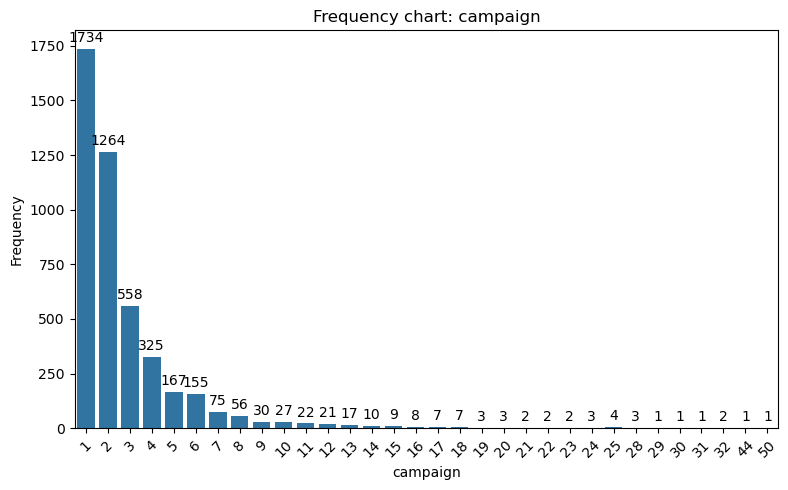

In [264]:
univariate_categorical_variable(df, 'campaign')

### Variable: pdays

As most of the data receive a -1 value, meaning that the client was never contacted before.
It makes sense to create a variable that groups that not being called before, called within 1 year, called more than 1 year.


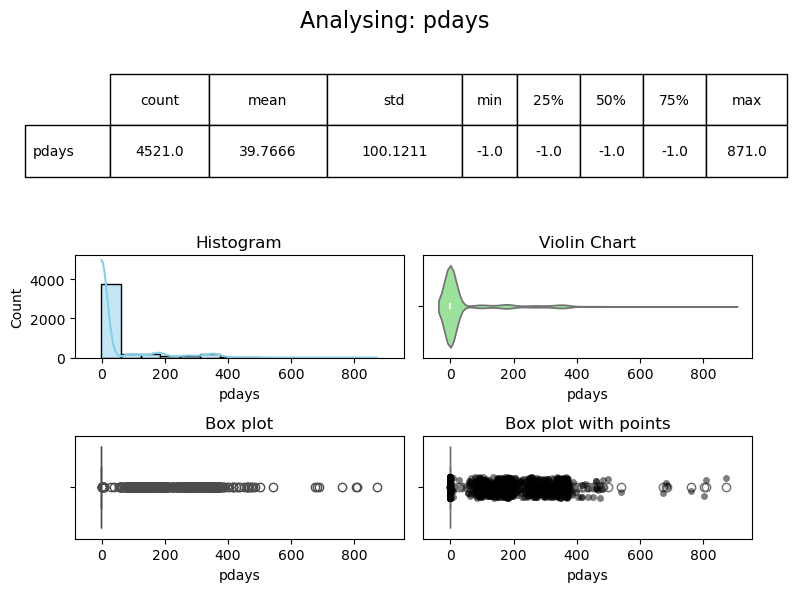

In [265]:
univariate_numeric_variable(df, 'pdays')

### Variable: Previous

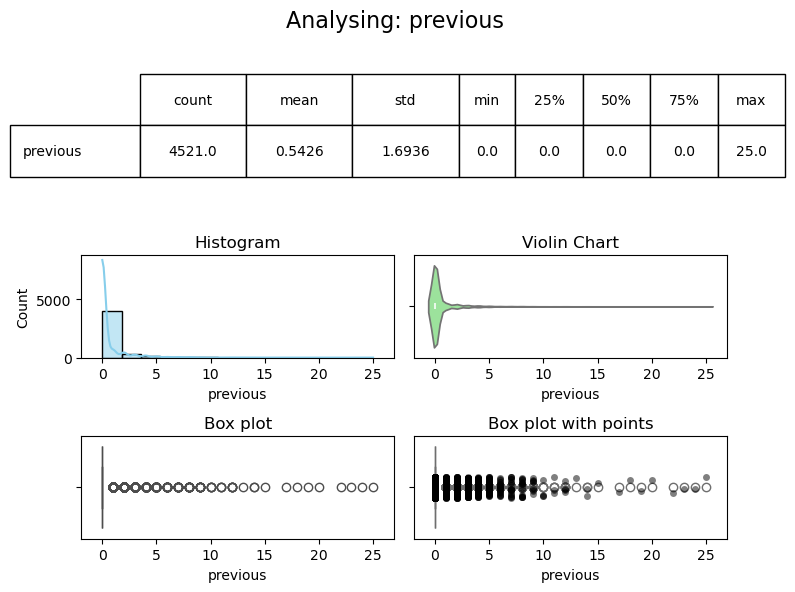

In [266]:
univariate_numeric_variable(df, 'previous')

Categorical variable describe:


,count,mean,std,min,25%,50%,75%,max
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


Frequency table of categorical variable (with percentage and total):


,previous,Frequency,Percentage (%)
0,0,3705,81.95
1,1,286,6.33
2,2,193,4.27
3,3,113,2.50
4,4,78,1.73
5,5,47,1.04
6,6,25,0.55
7,7,22,0.49
8,8,18,0.40
9,9,10,0.22


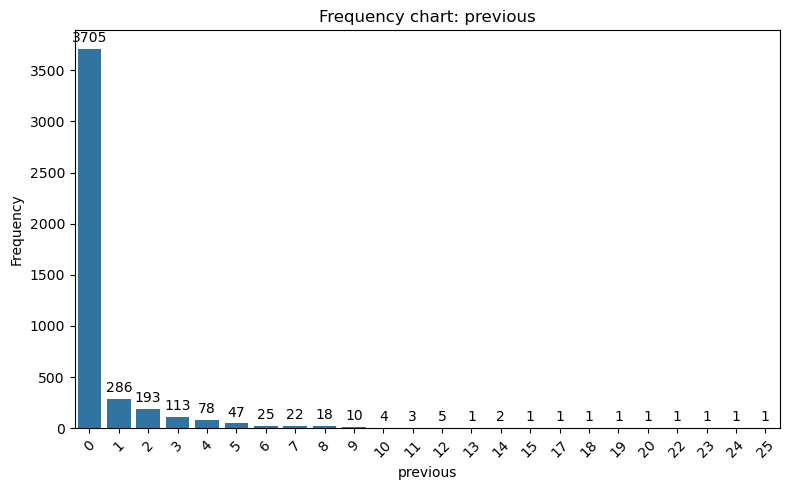

In [267]:
univariate_categorical_variable(df, 'previous')

### Variable: Poutcome

Categorical variable describe:


,count,unique,top,freq
poutcome,4521,4,unknown,3705


Frequency table of categorical variable (with percentage and total):


,poutcome,Frequency,Percentage (%)
0,unknown,3705,81.95
1,failure,490,10.84
2,other,197,4.36
3,success,129,2.85
4,Total,4521,100.00


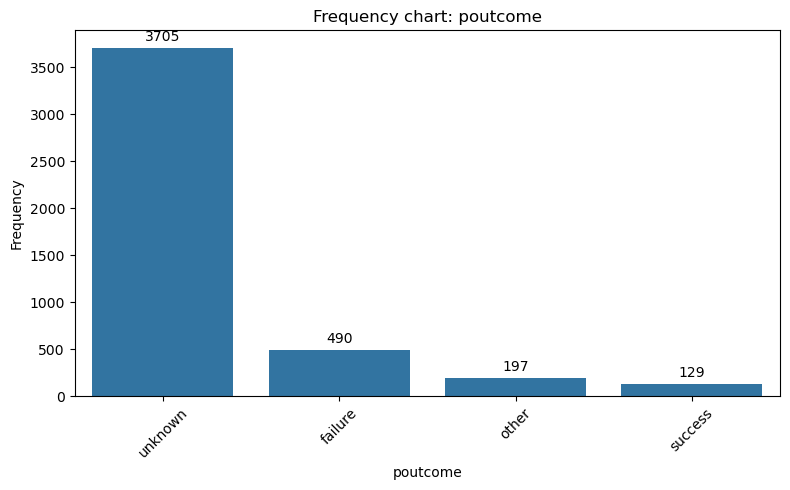

In [268]:
univariate_categorical_variable(df, 'poutcome')

### Variable: Y

Looking at the distribution of our dependent variable, Y, we can see that the event of interest is somewhat rare in nature in the dataset

Categorical variable describe:


,count,unique,top,freq
y,4521,2,no,4000


Frequency table of categorical variable (with percentage and total):


,y,Frequency,Percentage (%)
0,no,4000,88.48
1,yes,521,11.52
2,Total,4521,100.00


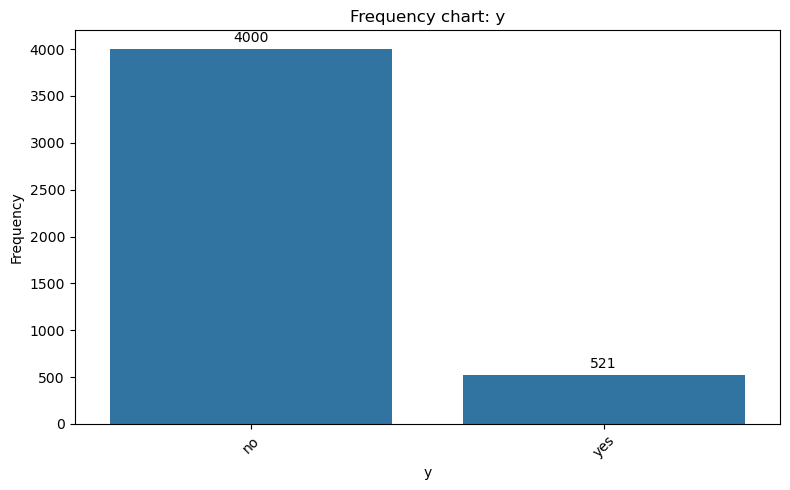

In [269]:
univariate_categorical_variable(df, 'y')

## FEATURE ENGINEERING

- Adjust variables from yes/no to 1/0

In [270]:
df1 = df.copy()

# Convert yes/no to binary 1/0
df1['default_adj'] = df['default'].str.lower().map({'yes': 1, 'no': 0})
df1['housing_adj'] = df['housing'].str.lower().map({'yes': 1, 'no': 0})
df1['loan_adj'] = df['loan'].str.lower().map({'yes': 1, 'no': 0})
df1['y_adj'] = df['y'].str.lower().map({'yes': 1, 'no': 0})


### Variable: default / default_adj

Note the the yes event is very rare.

In [271]:
bivariate_categorical_analysis(df1, 'default', 'y_adj')

,default,Frequency,Probability,Percentage (%)
0,no,4445,0.1152,98.32
1,yes,76,0.1184,1.68


### Variable: housing / housing_adj

In [272]:
bivariate_categorical_analysis(df1, 'housing', 'y_adj')

,housing,Frequency,Probability,Percentage (%)
0,no,1962,0.1534,43.4
1,yes,2559,0.0860,56.6


### Variable: loan / load_adj

In [273]:
bivariate_categorical_analysis(df1, 'loan', 'y_adj')

,loan,Frequency,Probability,Percentage (%)
0,no,3830,0.1248,84.72
1,yes,691,0.0622,15.28


### Varaible: Job

We do have some rare events here, and it might be good to group some of the categories.
One method would be group looking the average number or y per category, this way we ould not be changing mush the dispersion of the class.

Possible groups:
- management
- blue-collar 
- technician
- admin. & housemaid
- services & entrepreneur
- unemployed & self-employed
- unknown, student & retired 

In [274]:
bivariate_categorical_analysis(df1, 'job', 'y_adj')

,job,Frequency,Probability,Percentage (%)
0,admin.,478,0.1213,10.57
1,blue-collar,946,0.0729,20.92
2,entrepreneur,168,0.0893,3.72
3,housemaid,112,0.1250,2.48
4,management,969,0.1352,21.43
5,retired,230,0.2348,5.09
6,self-employed,183,0.1093,4.05
7,services,417,0.0911,9.22
8,student,84,0.2262,1.86
9,technician,768,0.1081,16.99


In [275]:
conditions = [
    df1['job'] == 'management',
    df1['job'] == 'blue-collar',
    df1['job'] == 'technician',
    (df1['job'] == 'admin.') | (df1['job'] == 'housemaid'),
    (df1['job'] == 'services') | (df1['job'] == 'entrepreneur'),
    (df1['job'] == 'unemployed') | (df1['job'] == 'self-employed'),
    (df1['job'] == 'unknown') | (df1['job'] == 'student') | (df1['job'] == 'retired'),
]

choices = ['job_management', 
           'job_blue-collar', 
           'job_technician', 
           'job_admin/housemaid', 
           'job_services/entrepreneur', 
           'job_unemployed/self-employed', 
           'job_unknown/student/retired']

df1['job_adj'] = np.select(conditions, choices, default='other')


Categorical variable describe:


,count,unique,top,freq
job_adj,4521,7,job_management,969


Frequency table of categorical variable (with percentage and total):


,job_adj,Frequency,Percentage (%)
0,job_management,969,21.43
1,job_blue-collar,946,20.92
2,job_technician,768,16.99
3,job_admin/housemaid,590,13.05
4,job_services/entrepreneur,585,12.94
5,job_unknown/student/retired,352,7.79
6,job_unemployed/self-employed,311,6.88
7,Total,4521,100.00


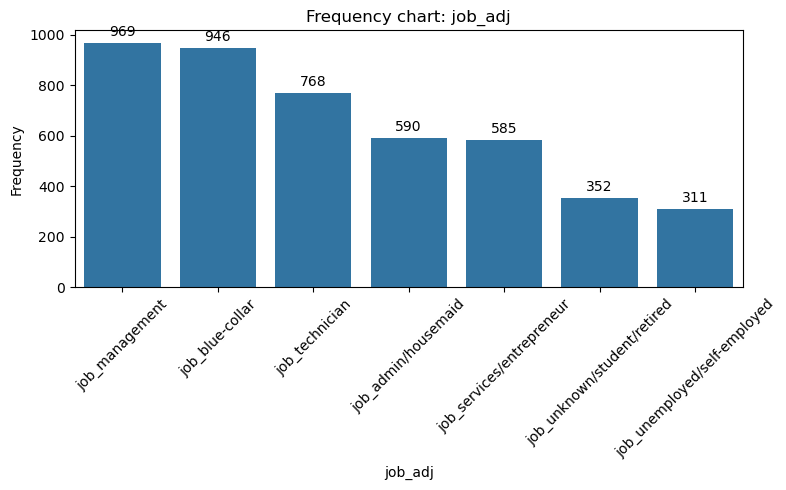

In [276]:
univariate_categorical_variable(df1, 'job_adj')

In [277]:
bivariate_categorical_analysis(df1, 'job_adj', 'y_adj')

,job_adj,Frequency,Probability,Percentage (%)
0,job_admin/housemaid,590,0.1220,13.05
1,job_blue-collar,946,0.0729,20.92
2,job_management,969,0.1352,21.43
3,job_services/entrepreneur,585,0.0906,12.94
4,job_technician,768,0.1081,16.99
5,job_unemployed/self-employed,311,0.1061,6.88
6,job_unknown/student/retired,352,0.2273,7.79


### Variable: marital

In [278]:
bivariate_categorical_analysis(df1, 'marital', 'y_adj')

,marital,Frequency,Probability,Percentage (%)
0,divorced,528,0.1458,11.68
1,married,2797,0.0990,61.87
2,single,1196,0.1396,26.45


### Variable: Education

- tertiary
- secondary
- primary & unknown

In [279]:
bivariate_categorical_analysis(df1, 'education', 'y_adj')

,education,Frequency,Probability,Percentage (%)
0,primary,678,0.0944,15.00
1,secondary,2306,0.1062,51.01
2,tertiary,1350,0.1430,29.86
3,unknown,187,0.1016,4.14


In [280]:
conditions = [
    df1['education'] == 'tertiary',
    df1['education'] == 'secondary',
    (df1['education'] == 'primary') | (df1['education'] == 'unknown'),
]

choices = ['edu_tertiary', 'edu_secondary', 'edu_primary/unknown']

df1['education_adj'] = np.select(conditions, choices, default='other')

In [281]:
bivariate_categorical_analysis(df1, 'education_adj', 'y_adj')

,education_adj,Frequency,Probability,Percentage (%)
0,edu_primary/unknown,865,0.0960,19.13
1,edu_secondary,2306,0.1062,51.01
2,edu_tertiary,1350,0.1430,29.86


### Variable: Contact

- cellular & telephone
- unknown

In [282]:
bivariate_categorical_analysis(df1, 'contact', 'y_adj')

,contact,Frequency,Probability,Percentage (%)
0,cellular,2896,0.1436,64.06
1,telephone,301,0.1462,6.66
2,unknown,1324,0.0461,29.29


In [283]:
conditions = [
    (df1['contact'] == 'cellular') | (df1['contact'] == 'telephone'),
]

choices = ['contact_cellular/telephone']

df1['contact_adj'] = np.select(conditions, choices, default='contact_unknown')

In [284]:
bivariate_categorical_analysis(df1, 'contact_adj', 'y_adj')

,contact_adj,Frequency,Probability,Percentage (%)
0,contact_cellular/telephone,3197,0.1439,70.71
1,contact_unknown,1324,0.0461,29.29


### Variable: Campaign

In [285]:
# Campaign variable grouping
conditions = [
    df1['campaign'] == 0,
    df1['campaign'] == 1,
    df1['campaign'] == 2,
]

choices = ['campaign_0', 'campaign_1', 'campaign_2']

df1['campaign_adj'] = np.select(conditions, choices, default='campaign_3+')


In [286]:
bivariate_categorical_analysis(df1, 'campaign', 'y_adj')

,campaign,Frequency,Probability,Percentage (%)
0,1,1734,0.1384,38.35
1,2,1264,0.1092,27.96
2,3,558,0.1022,12.34
3,4,325,0.1323,7.19
4,5,167,0.0539,3.69
5,6,155,0.1032,3.43
6,7,75,0.0800,1.66
7,8,56,0.0714,1.24
8,9,30,0.0667,0.66
9,10,27,0.0370,0.60


Categorical variable describe:


,count,unique,top,freq
campaign_adj,4521,3,campaign_1,1734


Frequency table of categorical variable (with percentage and total):


,campaign_adj,Frequency,Percentage (%)
0,campaign_1,1734,38.35
1,campaign_3+,1523,33.69
2,campaign_2,1264,27.96
3,Total,4521,100.00


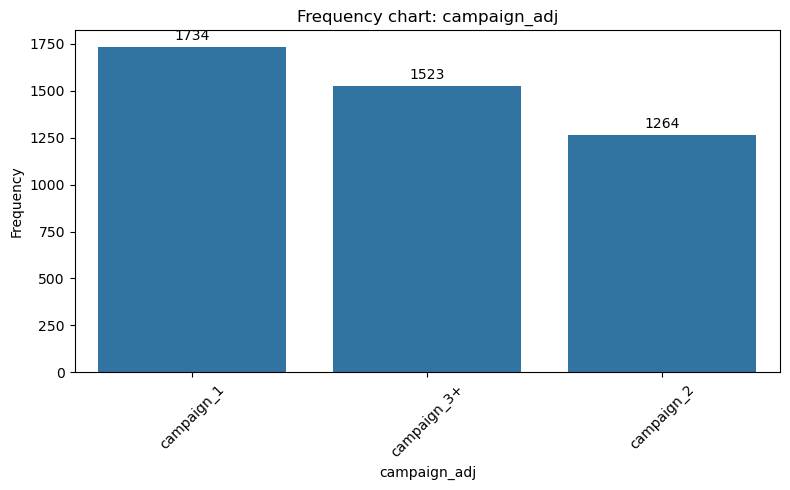

In [287]:
univariate_categorical_variable(df1, 'campaign_adj')

In [288]:
bivariate_categorical_analysis(df1, 'campaign_adj', 'y_adj')

,campaign_adj,Frequency,Probability,Percentage (%)
0,campaign_1,1734,0.1384,38.35
1,campaign_2,1264,0.1092,27.96
2,campaign_3+,1523,0.0939,33.69


### Group: Month

In [289]:
# Month variable grouping
conditions = [
    df1['month'] == 'may',
    (df1['month'] == 'jan') | (df1['month'] == 'feb') | (df1['month'] == 'mar'),
    (df1['month'] == 'apr') | (df1['month'] == 'jun'),
    (df1['month'] == 'jul') | (df1['month'] == 'aug') | (df1['month'] == 'sep'),
    (df1['month'] == 'oct') | (df1['month'] == 'nov') | (df1['month'] == 'dec'),
]

choices = ['May', 'Q1', 'Q2 (excl May)', 'Q3', 'Q4']

df1['month_adj'] = np.select(conditions, choices, default='other')

In [290]:
# Month variable grouping
conditions = [
    df1['month'] == 'may',
    df1['month'] == 'jul',
    (df1['month'] == 'nov') | (df1['month'] == 'jun') | (df1['month'] == 'jan'),
    df1['month'] == 'aug',
    (df1['month'] == 'feb') | (df1['month'] == 'apr'),
    (df1['month'] == 'sep') | (df1['month'] == 'mar') | (df1['month'] == 'dec') | (df1['month'] == 'oct'),
]

choices = ['May', 'Jul', 'Jan/Jun/Nov', 'Aug', 'Feb/Apr', 'Mar/Sep/Oct/Dec']

df1['month_adj2'] = np.select(conditions, choices, default='other')

In [291]:
bivariate_categorical_analysis(df1, 'month', 'y_adj')

,month,Frequency,Probability,Percentage (%)
0,apr,293,0.1911,6.48
1,aug,633,0.1248,14.00
2,dec,20,0.4500,0.44
3,feb,222,0.1712,4.91
4,jan,148,0.1081,3.27
5,jul,706,0.0864,15.62
6,jun,531,0.1036,11.75
7,mar,49,0.4286,1.08
8,may,1398,0.0665,30.92
9,nov,389,0.1003,8.60


Categorical variable describe:


,count,unique,top,freq
month_adj,4521,5,May,1398


Frequency table of categorical variable (with percentage and total):


,month_adj,Frequency,Percentage (%)
0,May,1398,30.92
1,Q3,1391,30.77
2,Q2 (excl May),824,18.23
3,Q4,489,10.82
4,Q1,419,9.27
5,Total,4521,100.00


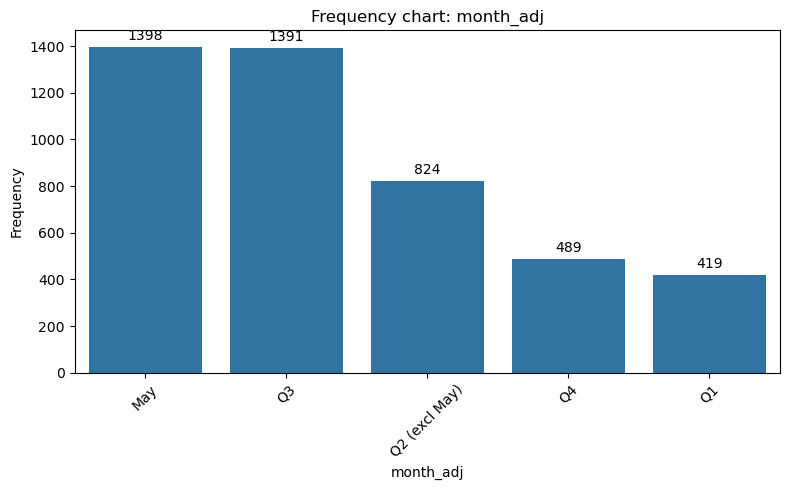

In [292]:
univariate_categorical_variable(df1, 'month_adj')

In [293]:
bivariate_categorical_analysis(df1, 'month_adj', 'y_adj')

,month_adj,Frequency,Probability,Percentage (%)
0,May,1398,0.0665,30.92
1,Q1,419,0.1790,9.27
2,Q2 (excl May),824,0.1347,18.23
3,Q3,1391,0.1129,30.77
4,Q4,489,0.1738,10.82


In [294]:
bivariate_categorical_analysis(df1, 'month_adj2', 'y_adj')

,month_adj2,Frequency,Probability,Percentage (%)
0,Aug,633,0.1248,14.00
1,Feb/Apr,515,0.1825,11.39
2,Jan/Jun/Nov,1068,0.1030,23.62
3,Jul,706,0.0864,15.62
4,Mar/Sep/Oct/Dec,201,0.4179,4.45
5,May,1398,0.0665,30.92


#### Variable: Pdays

In [295]:
# pdays variable grouping
conditions = [
    df1['pdays'] == -1,
    (df1['pdays'] > 0) & (df1['pdays'] < 365) ,
    (df1['pdays'] >= 365) ,
]

choices = ['Not contacted', 'Contacted < year', 'Contacted > year']

df1['pdays_adj'] = np.select(conditions, choices, default='other')

Categorical variable describe:


,count,unique,top,freq
pdays_adj,4521,3,Not contacted,3705


Frequency table of categorical variable (with percentage and total):


,pdays_adj,Frequency,Percentage (%)
0,Not contacted,3705,81.95
1,Contacted < year,747,16.52
2,Contacted > year,69,1.53
3,Total,4521,100.00


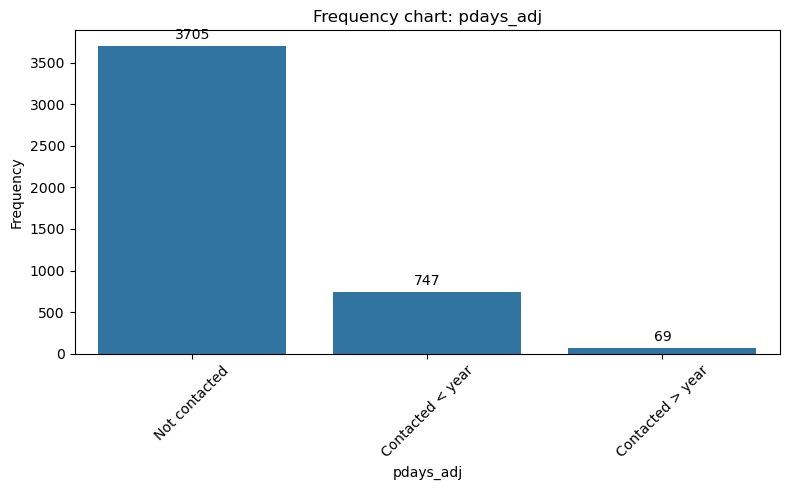

In [296]:
univariate_categorical_variable(df1, 'pdays_adj')

In [297]:
# pdays variable grouping
conditions = [
    df1['pdays'] == -1,
    (df1['pdays'] > 0) ,
]

choices = ['Not contacted', 'Contacted']

df1['pdays_adj2'] = np.select(conditions, choices, default='other')

In [298]:
bivariate_categorical_analysis(df1, 'pdays_adj', 'y_adj')

,pdays_adj,Frequency,Probability,Percentage (%)
0,Contacted < year,747,0.2209,16.52
1,Contacted > year,69,0.2754,1.53
2,Not contacted,3705,0.0910,81.95


In [299]:
bivariate_categorical_analysis(df1, 'pdays_adj2', 'y_adj')

,pdays_adj2,Frequency,Probability,Percentage (%)
0,Contacted,816,0.2255,18.05
1,Not contacted,3705,0.0910,81.95


### Variable: Previous

Something about pdays and previous looks like they are the same variable.
Analysing the using Spearman to calculate the correlation, this 2 variables has a Spearman correlation of 0.986, showing that they are close to the same variable, only one should be used in the model.


In [300]:
# previous variable grouping
conditions = [
    df1['previous'] == 0,
    (df1['previous'] > 0) ,
]

choices = ['previous_NotContacted', 'Previous_Contacted']

df1['previous_adj'] = np.select(conditions, choices, default='other')

In [301]:
bivariate_categorical_analysis(df1, 'previous_adj', 'y_adj')

,previous_adj,Frequency,Probability,Percentage (%)
0,Previous_Contacted,816,0.2255,18.05
1,previous_NotContacted,3705,0.0910,81.95


In [302]:
df_corr = df1[['previous', 'pdays']]

spearman_matrix = df_corr.corr(method='spearman')

print("Spearman Correlation Matrix:")
print(spearman_matrix.round(3))

Spearman Correlation Matrix:
          previous  pdays
previous     1.000  0.986
pdays        0.986  1.000


### Variable: Poutcome

In [303]:
# poutcome variable grouping
conditions = [
    df1['poutcome'] == 'unknown',
    df1['poutcome'] == 'failure' ,
]

choices = ['poutcome_unknown', 'poutcome_failure']

df1['poutcome_adj'] = np.select(conditions, choices, default='poutcome_success/other')

In [304]:
bivariate_categorical_analysis(df1, 'poutcome', 'y_adj')

,poutcome,Frequency,Probability,Percentage (%)
0,failure,490,0.1286,10.84
1,other,197,0.1929,4.36
2,success,129,0.6434,2.85
3,unknown,3705,0.0910,81.95


In [305]:
bivariate_categorical_analysis(df1, 'poutcome_adj', 'y_adj')

,poutcome_adj,Frequency,Probability,Percentage (%)
0,poutcome_failure,490,0.1286,10.84
1,poutcome_success/other,326,0.3712,7.21
2,poutcome_unknown,3705,0.0910,81.95


### Linearity Check

Check linearirity of the numeric variles to see if we can use them as numeric

#### Variable: Age

- Does not show linearitly with logit p.

<Figure size 800x600 with 0 Axes>

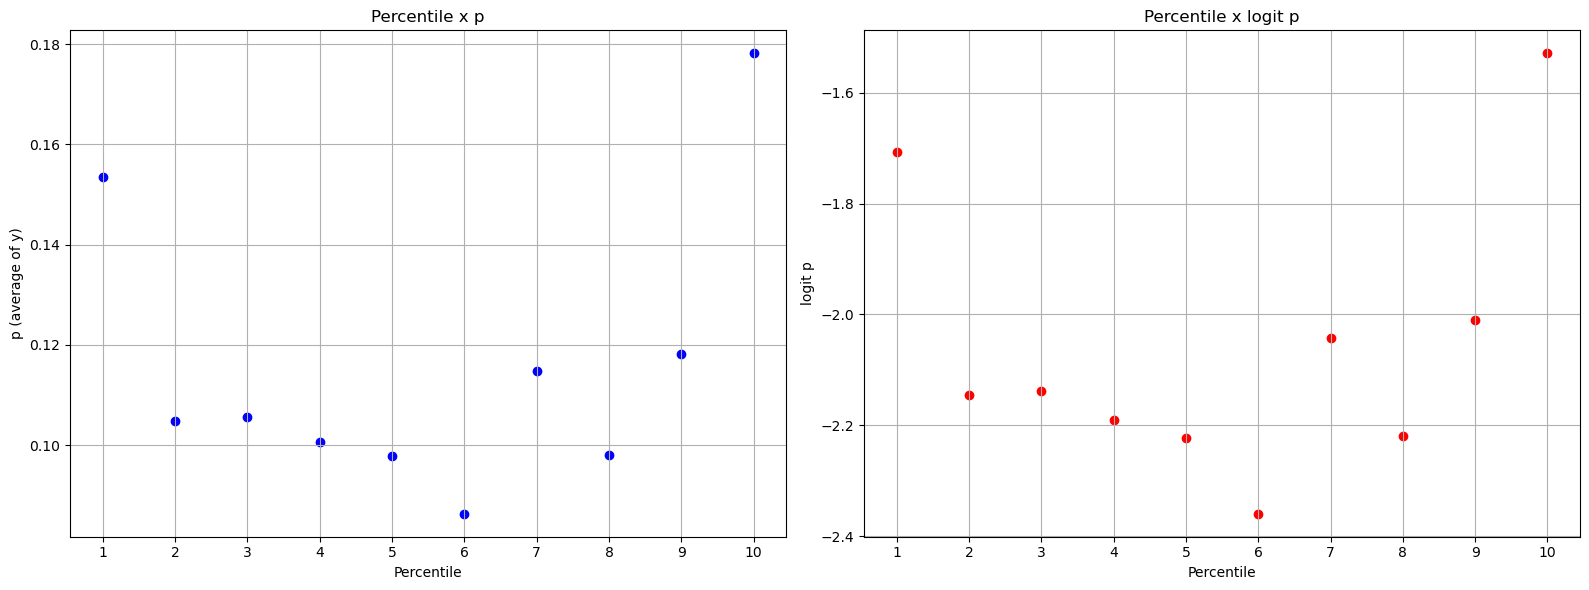

,percentile,n,min_x,max_x,p,logit_p
0,1,482,19,29,0.153527,-1.707202
1,2,573,30,32,0.104712,-2.145931
2,3,417,33,34,0.105516,-2.137389
3,4,368,35,36,0.100543,-2.191200
4,5,450,37,39,0.097778,-2.222164
5,6,533,40,43,0.086304,-2.359623
6,7,444,44,47,0.114865,-2.041984
7,8,418,48,51,0.098086,-2.218673
8,9,415,52,56,0.118072,-2.010813
9,10,421,57,87,0.178147,-1.528951


In [306]:
numeric_variable_analysis_percentile(df1, x='age', y='y_adj', q=10, chart='both')

In [307]:
# Save percentile table
percentile_age = numeric_variable_analysis_percentile(df1, x='age', y='y_adj', q=10, chart='none')

# add percentile groups to the original table
df1['percentile_group_age'] = df['age'].apply(
    lambda x: assign_percentile_group(x, percentile_age)
)

# Define you grouping rules
group_mapping = {
    '1': '19 - 29',
    '2': '30 - 36',
    '3': '30 - 36', 
    '4': '30 - 36',
    '5': '37 - 43',
    '6': '37 - 43',
    '7': '44 - 47',
    '8': '48 - 51',
    '9': '52 - 56',
    '10': '57 - 87'
}

# Apply the mapping
df1['age_adj'] = df1['percentile_group_age'].astype(str).map(group_mapping)


conditions = [
    ((df1['age'] >= 19) & (df1['age'] < 30) ) | (df1['age'] >= 70),
    (df1['age'] >= 30) & (df1['age'] < 45),
    (df1['age'] >= 45) & (df1['age'] < 70),
]

choices = ['age_19 - 29 or 70+', 'age_30 - 44', 'age_45 - 69']

df1['age_adj2'] = np.select(conditions, choices, default='other')


In [308]:
bivariate_categorical_analysis(df1, 'percentile_group_age', 'y_adj')

,percentile_group_age,Frequency,Probability,Percentage (%)
0,1,482,0.1535,10.66
1,10,421,0.1781,9.31
2,2,573,0.1047,12.67
3,3,417,0.1055,9.22
4,4,368,0.1005,8.14
5,5,450,0.0978,9.95
6,6,533,0.0863,11.79
7,7,444,0.1149,9.82
8,8,418,0.0981,9.25
9,9,415,0.1181,9.18


In [309]:
bivariate_categorical_analysis(df1, 'age_adj', 'y_adj')

,age_adj,Frequency,Probability,Percentage (%)
0,19 - 29,482,0.1535,10.66
1,30 - 36,1358,0.1038,30.04
2,37 - 43,983,0.0916,21.74
3,44 - 47,444,0.1149,9.82
4,48 - 51,418,0.0981,9.25
5,52 - 56,415,0.1181,9.18
6,57 - 87,421,0.1781,9.31


In [310]:
bivariate_categorical_analysis(df1, 'age_adj2', 'y_adj')

,age_adj2,Frequency,Probability,Percentage (%)
0,age_19 - 29 or 70+,543,0.1805,12.01
1,age_30 - 44,2446,0.0985,54.10
2,age_45 - 69,1532,0.1188,33.89


#### Variable: Balance

Looking at logit p chart:
- with 5 groups, it looks linear.
- with 10 groups, it does not look linear.
- with 15 groups it does not look linear.

Overall: we will need to categorize this variable.

Looking at probability chart, we could group:
- 1, 3, 5 : as below 0.10
- 2, 4 : as between 0.10 to 0.12
- 6, 7, 8, 10 : as between 0.12 to 0.14
- 9 : as being the only only above 0.18




<Figure size 800x600 with 0 Axes>

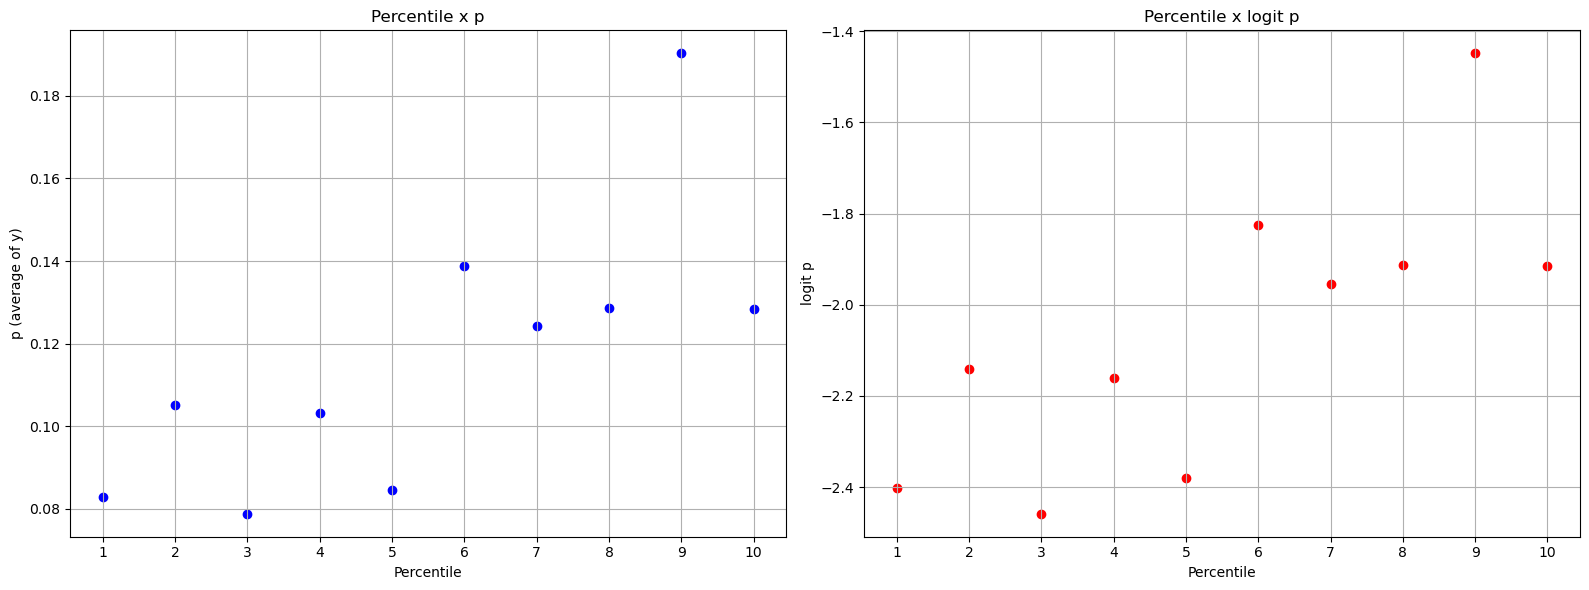

,percentile,n,min_x,max_x,p,logit_p
0,1,723,-3313,0,0.082988,-2.402430
1,2,190,1,23,0.105263,-2.140066
2,3,444,24,128,0.078829,-2.458367
3,4,455,130,263,0.103297,-2.161120
4,5,449,264,444,0.084633,-2.381007
5,6,454,445,725,0.138767,-1.825573
6,7,451,726,1147,0.124169,-1.953534
7,8,451,1148,1957,0.128603,-1.913367
8,9,452,1959,3913,0.190265,-1.448286
9,10,452,3921,71188,0.128319,-1.915908


In [311]:
numeric_variable_analysis_percentile(df1, x='balance', y='y_adj', q=10, chart='both')

In [312]:
# Save percentile table
percentile_balance = numeric_variable_analysis_percentile(df1, x='balance', y='y_adj', q=10, chart='none')

# add percentile groups to the original table
df1['percentile_group_balance'] = df['balance'].apply(
    lambda x: assign_percentile_group(x, percentile_balance)
)

# Define you grouping rules
group_mapping = {
    '1': 'balance_negative/24 to 128/264 to 444',
    '2': 'balance_1 to 23/130 to 263',
    '3': 'balance_negative/24 to 128/264 to 444', 
    '4': 'balance_1 to 23/130 to 263',
    '5': 'balance_negative/24 to 128/264 to 444',
    '6': 'balance_445 to 1957/3921+',
    '7': 'balance_445 to 1957/3921+',
    '8': 'balance_445 to 1957/3921+',
    '9': 'balance_1959 to 3916',
    '10': 'balance_445 to 1957/3921+'
}

# Apply the mapping
df1['balance_adj'] = df1['percentile_group_balance'].astype(str).map(group_mapping)

Categorical variable describe:


,count,unique,top,freq
balance_adj,4521,4,balance_445 to 1957/3921+,1808


Frequency table of categorical variable (with percentage and total):


,balance_adj,Frequency,Percentage (%)
0,balance_445 to 1957/3921+,1808,39.99
1,balance_negative/24 to 128/264 to 444,1616,35.74
2,balance_1 to 23/130 to 263,645,14.27
3,balance_1959 to 3916,452,10.00
4,Total,4521,100.00


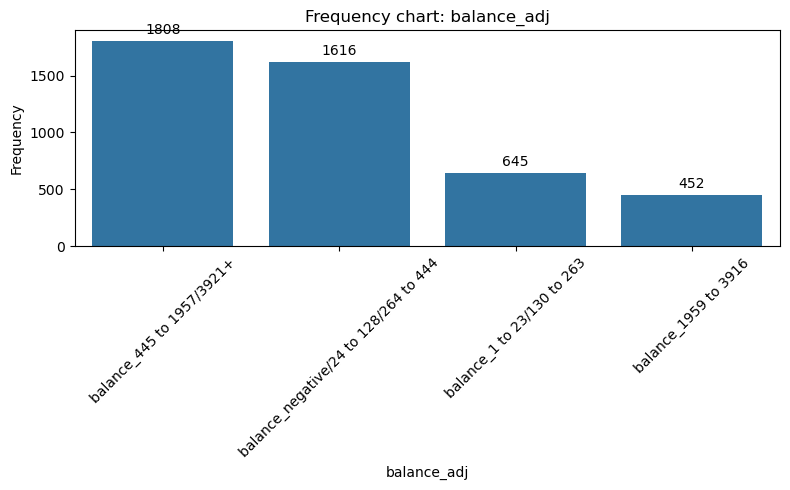

In [313]:
univariate_categorical_variable(df1, 'balance_adj')

In [314]:
bivariate_categorical_analysis(df1, 'balance_adj', 'y_adj')

,balance_adj,Frequency,Probability,Percentage (%)
0,balance_1 to 23/130 to 263,645,0.1039,14.27
1,balance_1959 to 3916,452,0.1903,10.00
2,balance_445 to 1957/3921+,1808,0.1300,39.99
3,balance_negative/24 to 128/264 to 444,1616,0.0823,35.74


#### Variable: Day

- Does not look linear with logit p.

It makes some logic to divide it between beginning. middle and end of the month, so:
- 1 to 10: start
- 11 to 20: middle
- 21 to 31: end


<Figure size 800x600 with 0 Axes>

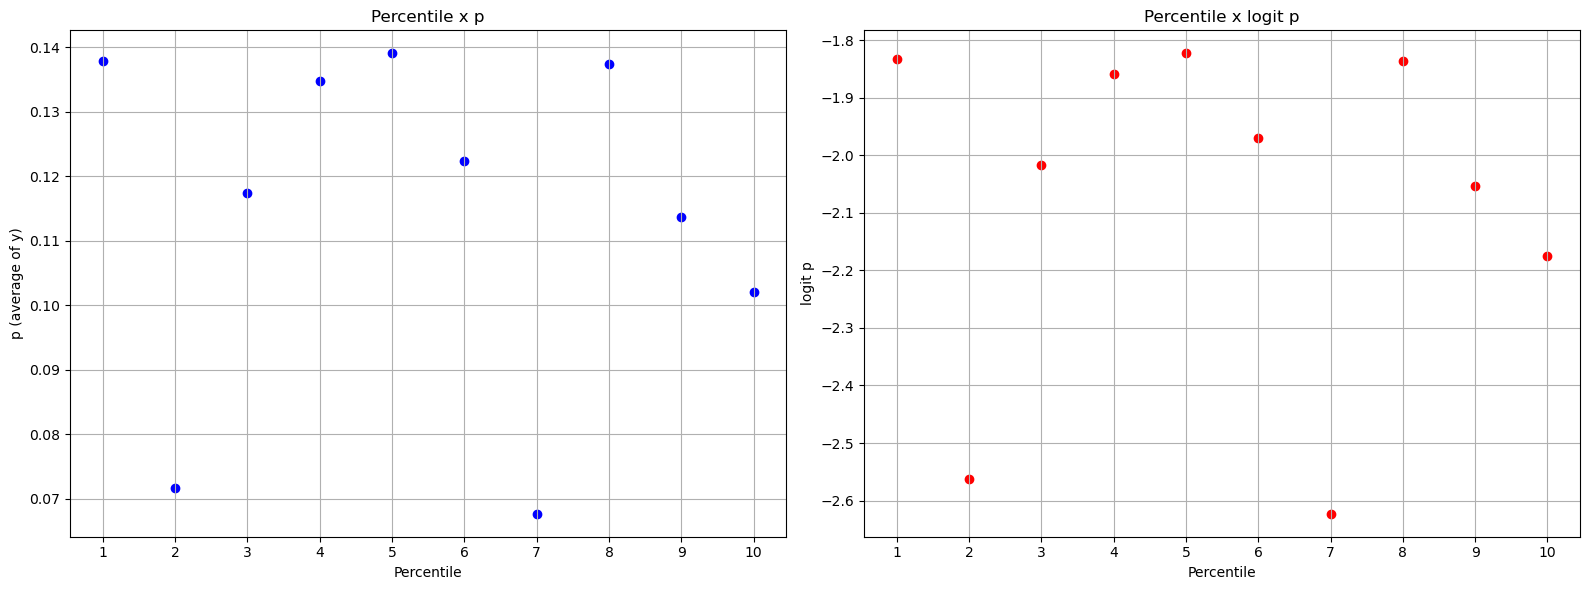

,percentile,n,min_x,max_x,p,logit_p
0,1,566,1,5,0.137809,-1.833607
1,2,377,6,7,0.071618,-2.562096
2,3,545,8,11,0.117431,-2.016984
3,4,512,12,14,0.134766,-1.859463
4,5,338,15,16,0.139053,-1.823176
5,6,417,17,18,0.122302,-1.970808
6,7,458,19,20,0.067686,-2.622797
7,8,422,21,24,0.137441,-1.836711
8,9,484,25,28,0.113636,-2.054124
9,10,402,29,31,0.101990,-2.175306


In [315]:
numeric_variable_analysis_percentile(df1, x='day', y='y_adj', q=10, chart='both')

In [316]:
# For sequential day numbers
df1['day_category'] = ((df1['day'] - 1) // 10).map({
    0: 'day_start',
    1: 'day_middle',
    2: 'day_end'
})


Categorical variable describe:


,count,unique,top,freq
day_category,4462,3,day_middle,1877


Frequency table of categorical variable (with percentage and total):


,day_category,Frequency,Percentage (%)
0,day_middle,1877,41.52
1,day_start,1336,29.55
2,day_end,1249,27.63
3,Total,4462,100.00


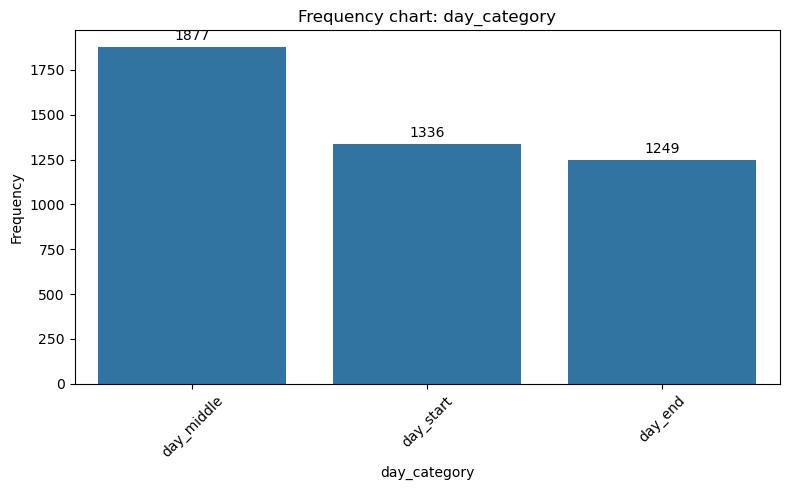

In [317]:
univariate_categorical_variable(df1, 'day_category')

In [318]:
bivariate_categorical_analysis(df1, 'day_category', 'y_adj')

,day_category,Frequency,Probability,Percentage (%)
0,day_end,1249,0.1201,27.63
1,day_middle,1877,0.1161,41.52
2,day_start,1336,0.1115,29.55


#### Variable: Duration

Looking at logit p chart:
- with 5 groups, it looks linear, 1st group being on the lowest side.
- with 10 groups, from groups 4-10 we have linearity, but groups 1-3 follow a diferent growth.
- with 15 groups, groups 2 is the one that looks out of point (p = 0 on that group), while all the other seems to be linear at a somewhat constant rate.
- with 20 groups, groups 2 and 3 does not fall under the linearity pattern (p = 0 on both groups), but all the other looks good.


Overall: I would use this variable as numeric.



<Figure size 800x600 with 0 Axes>

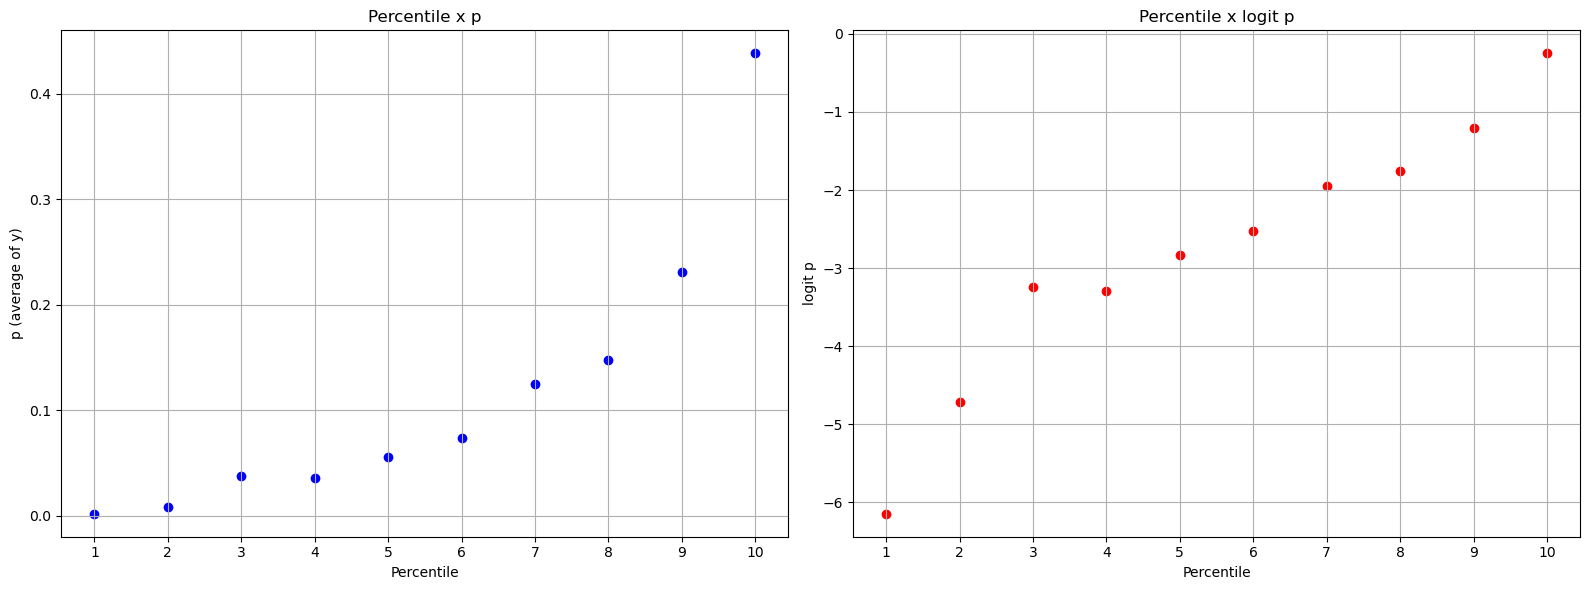

,percentile,n,min_x,max_x,p,logit_p
0,1,468,4,58,0.002137,-6.146329
1,2,449,59,89,0.008909,-4.711780
2,3,454,90,119,0.037445,-3.246720
3,4,446,120,149,0.035874,-3.291196
4,5,451,150,185,0.055432,-2.835564
5,6,447,186,226,0.073826,-2.529358
6,7,457,227,285,0.124726,-1.948413
7,8,447,286,383,0.147651,-1.753145
8,9,450,384,579,0.231111,-1.202048
9,10,452,580,3025,0.438053,-0.249067


In [319]:
numeric_variable_analysis_percentile(df1, x='duration', y='y_adj', q=10, chart='both')

## LOGISTIC REGRESSION MODEL

In [320]:
selected_variables = ['age_adj2', 
                      'job_adj', 
                      'marital', 
                      'education_adj', 
                      'default_adj',
                      'balance_adj',
                      'housing_adj',
                      'loan_adj',
                      'contact_adj',
                      'day_category',
                      'month_adj2',
                      'duration',
                      'campaign_adj',
                      'previous_adj',
                      'poutcome_adj',
                      'y_adj'
                      ]
df_model = df1[selected_variables]

df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age_adj2       4521 non-null   object
 1   job_adj        4521 non-null   object
 2   marital        4521 non-null   object
 3   education_adj  4521 non-null   object
 4   default_adj    4521 non-null   int64 
 5   balance_adj    4521 non-null   object
 6   housing_adj    4521 non-null   int64 
 7   loan_adj       4521 non-null   int64 
 8   contact_adj    4521 non-null   object
 9   day_category   4462 non-null   object
 10  month_adj2     4521 non-null   object
 11  duration       4521 non-null   int64 
 12  campaign_adj   4521 non-null   object
 13  previous_adj   4521 non-null   object
 14  poutcome_adj   4521 non-null   object
 15  y_adj          4521 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 565.3+ KB


### Dummy Creation

In [321]:
df_model_rl = pd.get_dummies(df_model, 
                             prefix='dummie_', 
                             columns=['age_adj2', 
                                      'job_adj',
                                      'marital', 
                                      'education_adj',
                                      'balance_adj',
                                      'contact_adj',
                                      'day_category',
                                      'month_adj2',
                                      'campaign_adj',
                                      'previous_adj',
                                      'poutcome_adj',
                                      ], 
                             dtype=np.int64)



In [322]:
# df_model_rl.info()

# df_model['age_adj2'].unique()

df_model_rl.columns.tolist()

['default_adj',
 'housing_adj',
 'loan_adj',
 'duration',
 'y_adj',
 'dummie__age_19 - 29 or 70+',
 'dummie__age_30 - 44',
 'dummie__age_45 - 69',
 'dummie__job_admin/housemaid',
 'dummie__job_blue-collar',
 'dummie__job_management',
 'dummie__job_services/entrepreneur',
 'dummie__job_technician',
 'dummie__job_unemployed/self-employed',
 'dummie__job_unknown/student/retired',
 'dummie__divorced',
 'dummie__married',
 'dummie__single',
 'dummie__edu_primary/unknown',
 'dummie__edu_secondary',
 'dummie__edu_tertiary',
 'dummie__balance_1 to 23/130 to 263',
 'dummie__balance_1959 to 3916',
 'dummie__balance_445 to 1957/3921+',
 'dummie__balance_negative/24 to 128/264 to 444',
 'dummie__contact_cellular/telephone',
 'dummie__contact_unknown',
 'dummie__day_end',
 'dummie__day_middle',
 'dummie__day_start',
 'dummie__Aug',
 'dummie__Feb/Apr',
 'dummie__Jan/Jun/Nov',
 'dummie__Jul',
 'dummie__Mar/Sep/Oct/Dec',
 'dummie__May',
 'dummie__campaign_1',
 'dummie__campaign_2',
 'dummie__campaign_

In [323]:
# X variables in the model
X = df_model_rl.drop([  'y_adj', 'default_adj',
                        'dummie__age_19 - 29 or 70+',
                        # 'dummie__age_30 - 44',
                        # 'dummie__age_45 - 69',
                        # 'dummie__job_admin/housemaid',
                        # 'dummie__job_blue-collar',
                        # 'dummie__job_management',
                        # 'dummie__job_services/entrepreneur',
                        # 'dummie__job_technician',
                        # 'dummie__job_unemployed/self-employed',
                        'dummie__job_unknown/student/retired',
                        'dummie__divorced',
                        # 'dummie__married',
                        # 'dummie__single',
                        # 'dummie__edu_primary/unknown',
                        # 'dummie__edu_secondary',
                        'dummie__edu_tertiary',
                        # 'dummie__balance_1 to 23/130 to 263',
                        'dummie__balance_1959 to 3916',
                        # 'dummie__balance_445 to 1957/3921+',
                        # 'dummie__balance_negative/24 to 128/264 to 444',
                        # 'dummie__contact_cellular/telephone',
                        'dummie__contact_unknown',
                        'dummie__day_end',
                        'dummie__day_middle',
                        'dummie__day_start',
                        'dummie__Aug',
                        'dummie__Feb/Apr',
                        'dummie__Jan/Jun/Nov',
                        'dummie__Jul',
                        'dummie__Mar/Sep/Oct/Dec',
                        'dummie__May',
                        'dummie__campaign_1',
                        # 'dummie__campaign_2',
                        # 'dummie__campaign_3+',
                        # 'dummie__Previous_Contacted',
                        'dummie__previous_NotContacted',
                        # 'dummie__poutcome_failure',
                        # 'dummie__poutcome_success/other',
                        'dummie__poutcome_unknown'
                      ], axis = 1)

# Y
y = df_model_rl['y_adj']

# Add constant
X = sm.add_constant(X)

df_model_rl_final = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(df_model_rl_final.summary())

pred_model = df_model_rl_final.predict(X)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  y_adj   No. Observations:                 4521
Model:                            GLM   Df Residuals:                     4497
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1148.5
Date:                Mon, 22 Sep 2025   Deviance:                       2296.9
Time:                        11:24:35   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1867
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [324]:
df_model_rl_final.summary2().tables[1]


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-1.908180,0.350638,-5.442026,5.267805e-08,-2.595418,-1.220943
housing_adj,-0.544423,0.120809,-4.506465,6.591646e-06,-0.781205,-0.307641
loan_adj,-0.737927,0.194100,-3.801788,1.436556e-04,-1.118357,-0.357498
duration,0.004050,0.000196,20.680275,5.214233e-95,0.003666,0.004434
dummie__age_30 - 44,-0.394391,0.170107,-2.318492,2.042261e-02,-0.727794,-0.060988
dummie__age_45 - 69,-0.322590,0.183231,-1.760563,7.831236e-02,-0.681716,0.036536
dummie__job_admin/housemaid,-0.479204,0.223092,-2.148008,3.171313e-02,-0.916456,-0.041951
dummie__job_blue-collar,-0.885150,0.227874,-3.884382,1.025907e-04,-1.331775,-0.438525
dummie__job_management,-0.550192,0.221330,-2.485841,1.292456e-02,-0.983992,-0.116393
dummie__job_services/entrepreneur,-0.742394,0.242792,-3.057734,2.230173e-03,-1.218258,-0.266530


With all p-values under 0.10, I fix this as my model.

In [325]:
# Calculate exponential fo the parameters
np.exp(df_model_rl_final.params)

const                                            0.148350
housing_adj                                      0.580177
loan_adj                                         0.478104
duration                                         1.004058
dummie__age_30 - 44                              0.674090
dummie__age_45 - 69                              0.724271
dummie__job_admin/housemaid                      0.619276
dummie__job_blue-collar                          0.412652
dummie__job_management                           0.576839
dummie__job_services/entrepreneur                0.475973
dummie__job_technician                           0.550483
dummie__job_unemployed/self-employed             0.407517
dummie__married                                  0.658018
dummie__single                                   0.728425
dummie__edu_primary/unknown                      0.633276
dummie__edu_secondary                            0.758680
dummie__balance_1 to 23/130 to 263               0.606703
dummie__balanc

## OBJECTIVE OF THE MODEL

### Decide

In [326]:
# Create a DataFrame to work with
df5 = pd.DataFrame({
    'true_value': y,          # Actual results (0 or 1)
    'pred_prob': pred_model      # Predicted probabilities (0.0 to 1.0)
})

# Define cutoff thresholds to test
cutoffs = np.arange(0.05, 1, 0.05)  # From 0.1 to 0.9 in steps of 0.05

# Calculate metrics for each cutoff
results = []
for cutoff in cutoffs:
    # Make predictions using this cutoff
    y_pred_custom = (df5['pred_prob'] >= cutoff).astype(int)
    
    results.append({
        'cutoff': cutoff,
        'precision': precision_score(df5['true_value'], y_pred_custom, zero_division=0),
        'recall': recall_score(df5['true_value'], y_pred_custom, zero_division=0),
        'accuracy': accuracy_score(df5['true_value'], y_pred_custom),
        'f1_score': f1_score(df5['true_value'], y_pred_custom, zero_division=0),
        'n_positives': y_pred_custom.sum()  # Number of positive predictions
    })

# Convert to DataFrame
cutoff_df = pd.DataFrame(results)
print(cutoff_df.round(4))


    cutoff  precision  recall  accuracy  f1_score  n_positives
0     0.05     0.2219  0.9520    0.6098    0.3599         2235
1     0.10     0.3264  0.8407    0.7817    0.4702         1342
2     0.15     0.4192  0.7274    0.8525    0.5319          904
3     0.20     0.4622  0.6334    0.8728    0.5344          714
4     0.25     0.5115  0.5566    0.8876    0.5331          567
5     0.30     0.5347  0.4875    0.8921    0.5100          475
6     0.35     0.5553  0.4242    0.8945    0.4810          398
7     0.40     0.5877  0.3666    0.8974    0.4515          325
8     0.45     0.5896  0.3033    0.8954    0.4005          268
9     0.50     0.5928  0.2514    0.8938    0.3531          221
10    0.55     0.6064  0.2188    0.8936    0.3216          188
11    0.60     0.6144  0.1804    0.8925    0.2789          153
12    0.65     0.6328  0.1555    0.8923    0.2496          128
13    0.70     0.6286  0.1267    0.8907    0.2109          105
14    0.75     0.6353  0.1036    0.8898    0.1782      

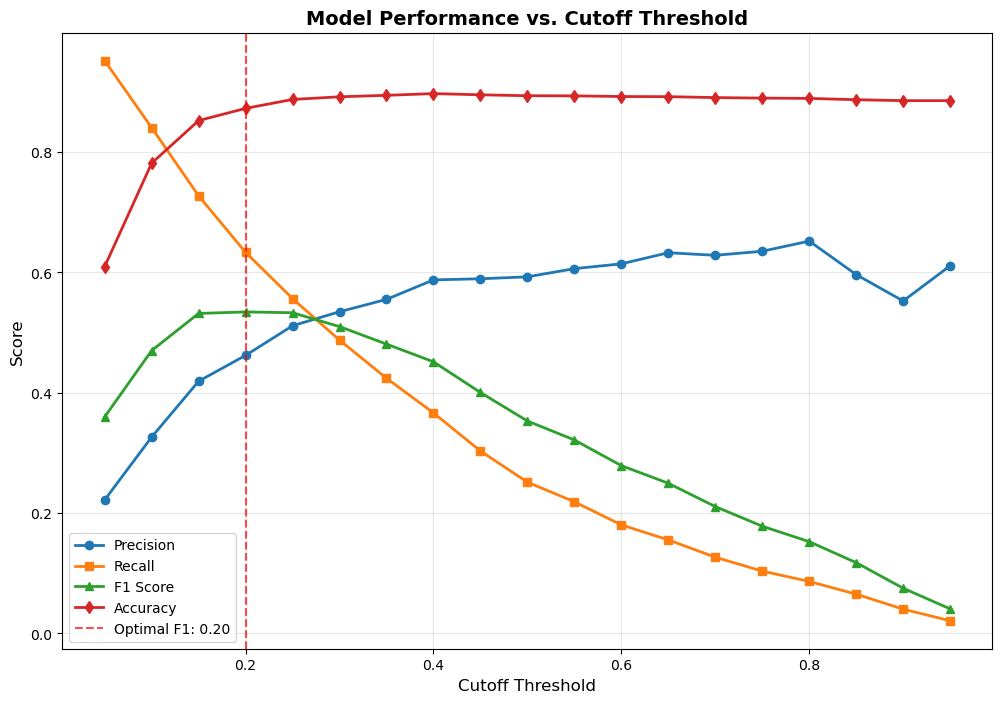

Optimal cutoff based on F1 score: 0.200
F1 score at optimal cutoff: 0.534


In [327]:
plt.figure(figsize=(12, 8))

# Plot precision, recall, F1 score
plt.plot(cutoff_df['cutoff'], cutoff_df['precision'], 'o-', label='Precision', linewidth=2)
plt.plot(cutoff_df['cutoff'], cutoff_df['recall'], 's-', label='Recall', linewidth=2)
plt.plot(cutoff_df['cutoff'], cutoff_df['f1_score'], '^-', label='F1 Score', linewidth=2)
plt.plot(cutoff_df['cutoff'], cutoff_df['accuracy'], 'd-', label='Accuracy', linewidth=2)

# Find optimal F1 score point
optimal_idx = cutoff_df['f1_score'].idxmax()
optimal_cutoff = cutoff_df.loc[optimal_idx, 'cutoff']
optimal_f1 = cutoff_df.loc[optimal_idx, 'f1_score']

# Mark optimal point
plt.axvline(x=optimal_cutoff, color='red', linestyle='--', alpha=0.7, 
            label=f'Optimal F1: {optimal_cutoff:.2f}')

plt.xlabel('Cutoff Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance vs. Cutoff Threshold', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Optimal cutoff based on F1 score: {optimal_cutoff:.3f}")
print(f"F1 score at optimal cutoff: {optimal_f1:.3f}")

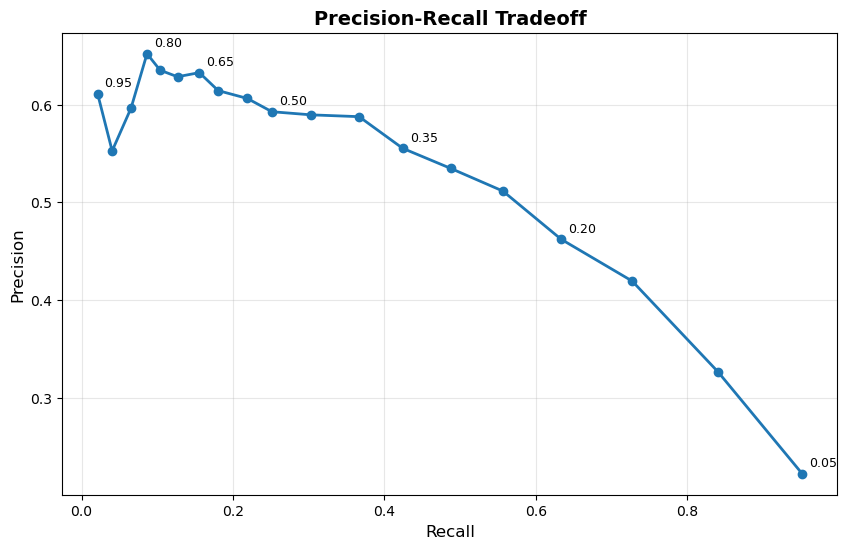

In [328]:
plt.figure(figsize=(10, 6))

# Precision-Recall tradeoff
plt.plot(cutoff_df['recall'], cutoff_df['precision'], 'o-', linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Tradeoff', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Annotate some key points
for i, row in cutoff_df.iloc[::3].iterrows():  # Every 3rd point
    plt.annotate(f"{row['cutoff']:.2f}", 
                (row['recall'], row['precision']),
                textcoords="offset points", 
                xytext=(5,5), 
                ha='left',
                fontsize=9)

plt.show()

<Figure size 1200x600 with 0 Axes>

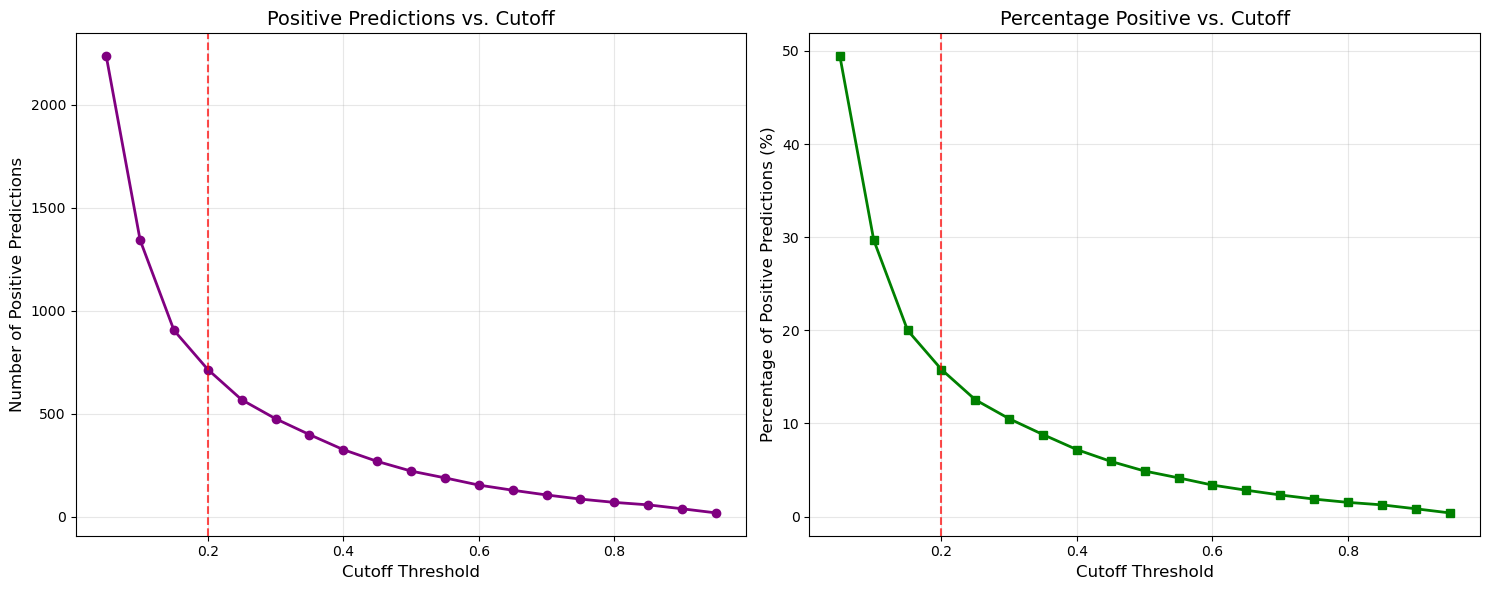

In [329]:
plt.figure(figsize=(12, 6))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left: Number of positive predictions
ax1.plot(cutoff_df['cutoff'], cutoff_df['n_positives'], 'o-', color='purple', linewidth=2)
ax1.set_xlabel('Cutoff Threshold', fontsize=12)
ax1.set_ylabel('Number of Positive Predictions', fontsize=12)
ax1.set_title('Positive Predictions vs. Cutoff', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.axvline(x=optimal_cutoff, color='red', linestyle='--', alpha=0.7)

# Right: Percentage of positive predictions
total_samples = len(df5['true_value'])
percentage_positives = (cutoff_df['n_positives'] / total_samples) * 100
ax2.plot(cutoff_df['cutoff'], percentage_positives, 's-', color='green', linewidth=2)
ax2.set_xlabel('Cutoff Threshold', fontsize=12)
ax2.set_ylabel('Percentage of Positive Predictions (%)', fontsize=12)
ax2.set_title('Percentage Positive vs. Cutoff', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.axvline(x=optimal_cutoff, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

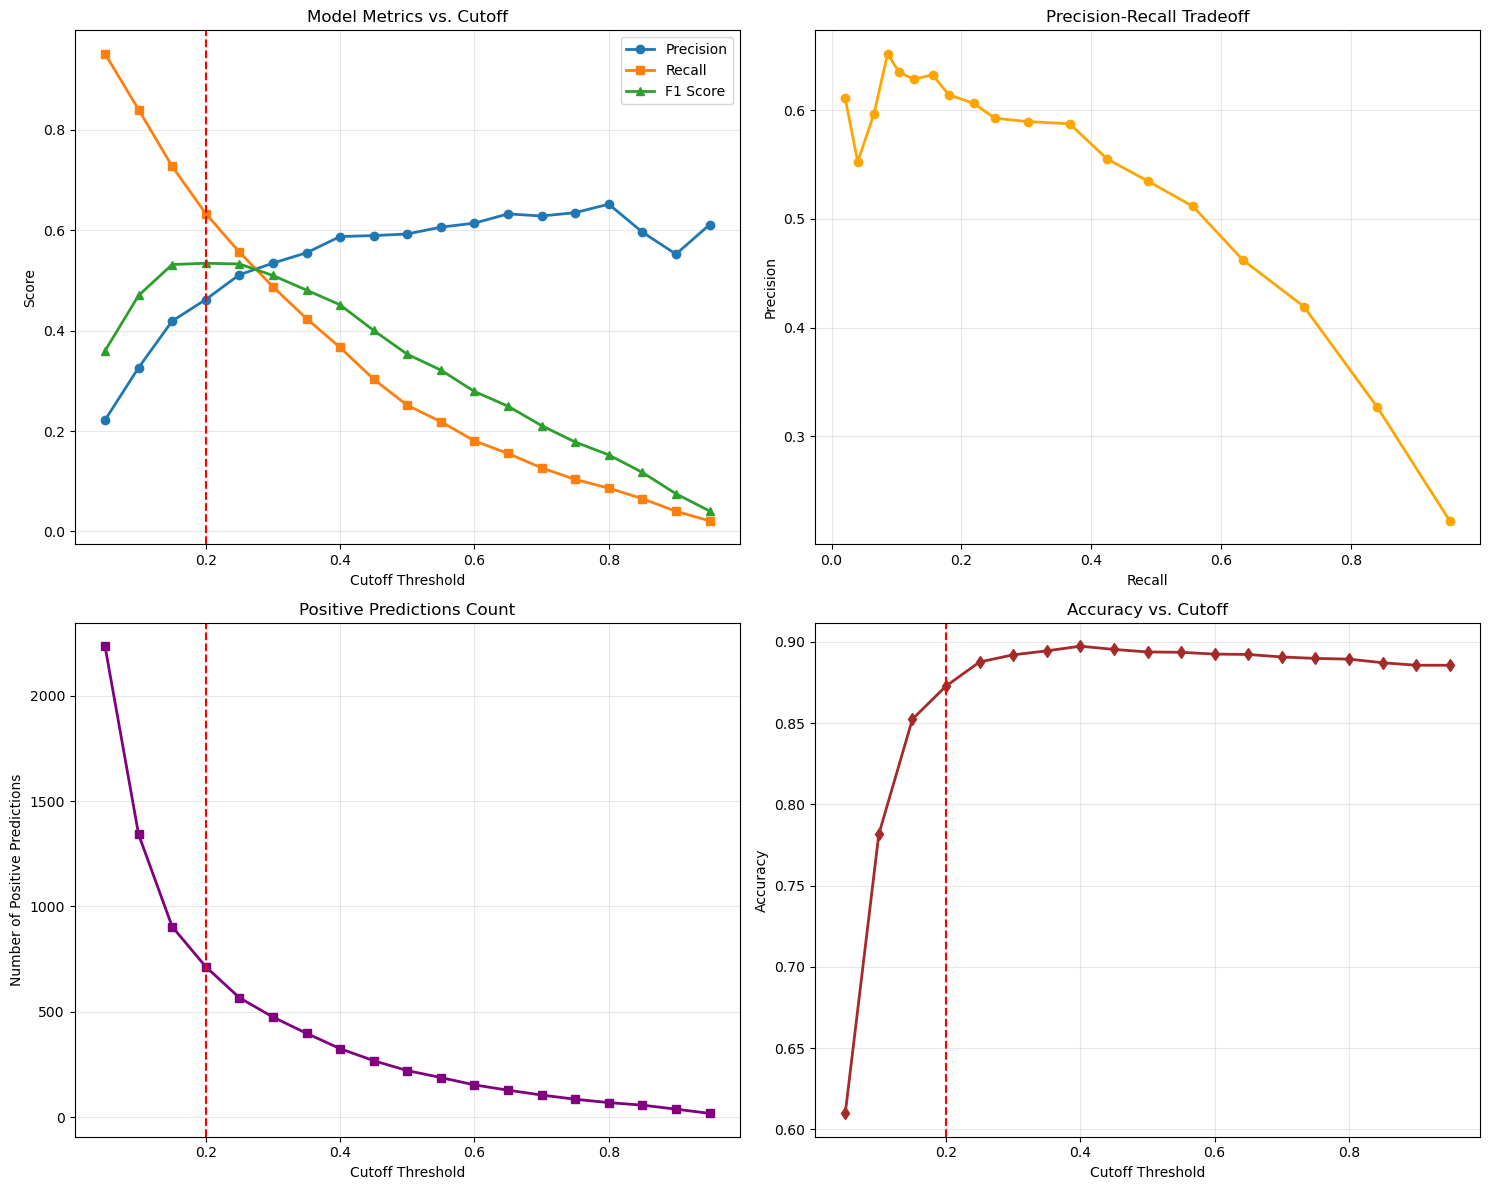

In [330]:
plt.figure(figsize=(14, 10))

# Create 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Top-left: Main metrics
ax1.plot(cutoff_df['cutoff'], cutoff_df['precision'], 'o-', label='Precision', linewidth=2)
ax1.plot(cutoff_df['cutoff'], cutoff_df['recall'], 's-', label='Recall', linewidth=2)
ax1.plot(cutoff_df['cutoff'], cutoff_df['f1_score'], '^-', label='F1 Score', linewidth=2)
ax1.set_xlabel('Cutoff Threshold')
ax1.set_ylabel('Score')
ax1.set_title('Model Metrics vs. Cutoff')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axvline(x=optimal_cutoff, color='red', linestyle='--')

# Top-right: Precision-Recall tradeoff
ax2.plot(cutoff_df['recall'], cutoff_df['precision'], 'o-', linewidth=2, color='orange')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Tradeoff')
ax2.grid(True, alpha=0.3)

# Bottom-left: Positive predictions count
ax3.plot(cutoff_df['cutoff'], cutoff_df['n_positives'], 's-', color='purple', linewidth=2)
ax3.set_xlabel('Cutoff Threshold')
ax3.set_ylabel('Number of Positive Predictions')
ax3.set_title('Positive Predictions Count')
ax3.grid(True, alpha=0.3)
ax3.axvline(x=optimal_cutoff, color='red', linestyle='--')

# Bottom-right: Accuracy
ax4.plot(cutoff_df['cutoff'], cutoff_df['accuracy'], 'd-', color='brown', linewidth=2)
ax4.set_xlabel('Cutoff Threshold')
ax4.set_ylabel('Accuracy')
ax4.set_title('Accuracy vs. Cutoff')
ax4.grid(True, alpha=0.3)
ax4.axvline(x=optimal_cutoff, color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [331]:
# Create a decision table
decision_table = cutoff_df.copy()
decision_table['tradeoff'] = decision_table['precision'] - decision_table['recall']

# Add recommendations
def get_recommendation(row):
    if row['precision'] > 0.8 and row['recall'] > 0.5:
        return "Balanced - Good for both precision and recall"
    elif row['precision'] > 0.9:
        return "High precision - Low false positives"
    elif row['recall'] > 0.8:
        return "High recall - Low false negatives"
    elif row['n_positives'] < 50:
        return "Very conservative - Few positives"
    else:
        return "Evaluate based on business needs"

decision_table['recommendation'] = decision_table.apply(get_recommendation, axis=1)

print("Cutoff Decision Table:")
display(decision_table[['cutoff', 'precision', 'recall', 'f1_score', 'accuracy', 'n_positives', 'recommendation']].round(4))

Cutoff Decision Table:


,cutoff,precision,recall,f1_score,accuracy,n_positives,recommendation
0,0.05,0.2219,0.9520,0.3599,0.6098,2235,High recall - Low false negatives
1,0.10,0.3264,0.8407,0.4702,0.7817,1342,High recall - Low false negatives
2,0.15,0.4192,0.7274,0.5319,0.8525,904,Evaluate based on business needs
3,0.20,0.4622,0.6334,0.5344,0.8728,714,Evaluate based on business needs
4,0.25,0.5115,0.5566,0.5331,0.8876,567,Evaluate based on business needs
5,0.30,0.5347,0.4875,0.5100,0.8921,475,Evaluate based on business needs
6,0.35,0.5553,0.4242,0.4810,0.8945,398,Evaluate based on business needs
7,0.40,0.5877,0.3666,0.4515,0.8974,325,Evaluate based on business needs
8,0.45,0.5896,0.3033,0.4005,0.8954,268,Evaluate based on business needs
9,0.50,0.5928,0.2514,0.3531,0.8938,221,Evaluate based on business needs


In [332]:
# evaluating the decision on the cut-off point
df5['pred_f1_opt'] = np.where(df5['pred_prob'] >= optimal_cutoff, 1, 0)

# Calculate confusion matrix
cm = confusion_matrix(df5['true_value'], df5['pred_f1_opt'])

# Create a nice display of the confusion matrix
cm_df = pd.DataFrame(cm, 
                    index=['Actual Negative', 'Actual Positive'],
                    columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix at Optimal Cutoff:")
print(cm_df)
print(f"\nCutoff threshold: {optimal_cutoff:.3f}")



Confusion Matrix at Optimal Cutoff:
                 Predicted Negative  Predicted Positive
Actual Negative                3616                 384
Actual Positive                 191                 330

Cutoff threshold: 0.200


In [333]:
# Find optimal PR score point
# Find optimal crossover point where precision ≈ recall
diff = (cutoff_df['precision'] - cutoff_df['recall']).abs()
optimal_PR_idx = diff.idxmin()
optimal_precision = cutoff_df.loc[optimal_PR_idx, 'precision'] 
optimal_PR_cutoff = cutoff_df.loc[optimal_PR_idx, 'cutoff']

# evaluating the decision on the cut-off point
df5['pred_pr_opt'] = np.where(df5['pred_prob'] >= optimal_PR_cutoff, 1, 0)

# Calculate confusion matrix
cm = confusion_matrix(df5['true_value'], df5['pred_pr_opt'])

# Create a nice display of the confusion matrix
cm_df = pd.DataFrame(cm, 
                    index=['Actual Negative', 'Actual Positive'],
                    columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix at Optimal PR Cutoff:")
print(cm_df)
print(f"\nCutoff threshold: {optimal_PR_cutoff:.3f}")

Confusion Matrix at Optimal PR Cutoff:
                 Predicted Negative  Predicted Positive
Actual Negative                3723                 277
Actual Positive                 231                 290

Cutoff threshold: 0.250


### Sort

In [334]:
# Create a DataFrame to work with
df6 = pd.DataFrame({
    'true_value': y,          # Actual results (0 or 1)
    'pred_prob': pred_model      # Predicted probabilities (0.0 to 1.0)
})

# Sort the DataFrame by the 'predicted_probability' column, descending
df_sorted = df6.sort_values(by='pred_prob', ascending=False).reset_index(drop=True)

# Calculate lift based on population percentiles, not probability thresholds
n_total = len(df_sorted)
percentiles = np.arange(0.05, 1.05, 0.05)  # Include 100% (1.0)

# Calculate total positives and negatives
total_positives = df_sorted['true_value'].sum()
total_negatives = len(df_sorted) - total_positives

results = []
for pct in percentiles:
    # Select top pct% of population by predicted probability
    n_select = int(n_total * pct)
    df_top = df_sorted.head(n_select)
    
    # Calculate metrics for this segment
    tp = df_top['true_value'].sum()
    n_selected = len(df_top)
    
    # Response rate in this segment
    segment_response_rate = tp / n_selected if n_selected > 0 else 0
    
    # Lift = response rate in segment / overall response rate
    lift = segment_response_rate / overall_rate if overall_rate > 0 else 0
    
    # For completeness, you can calculate other metrics
    precision = tp / n_selected if n_selected > 0 else 0
    
    results.append({
        'percentile': pct,
        'n_selected': n_selected,
        'true_positives': tp,
        'segment_response_rate': segment_response_rate,
        'lift': lift,
        'cumulative_lift': lift  # This will be properly cumulative now
    })

percentile_df = pd.DataFrame(results)

# The cumulative lift should now approach 1.0 at 100% percentile
print(percentile_df.round(4))

    percentile  n_selected  true_positives  segment_response_rate    lift  \
0         0.05         226             134                 0.5929  5.1451   
1         0.10         452             245                 0.5420  4.7035   
2         0.15         678             319                 0.4705  4.0828   
3         0.20         904             379                 0.4192  3.6380   
4         0.25        1130             410                 0.3628  3.1485   
5         0.30        1356             439                 0.3237  2.8093   
6         0.35        1582             459                 0.2901  2.5177   
7         0.40        1808             477                 0.2638  2.2894   
8         0.45        2034             489                 0.2404  2.0862   
9         0.50        2260             497                 0.2199  1.9083   
10        0.55        2486             508                 0.2043  1.7732   
11        0.60        2712             513                 0.1892  1.6414   

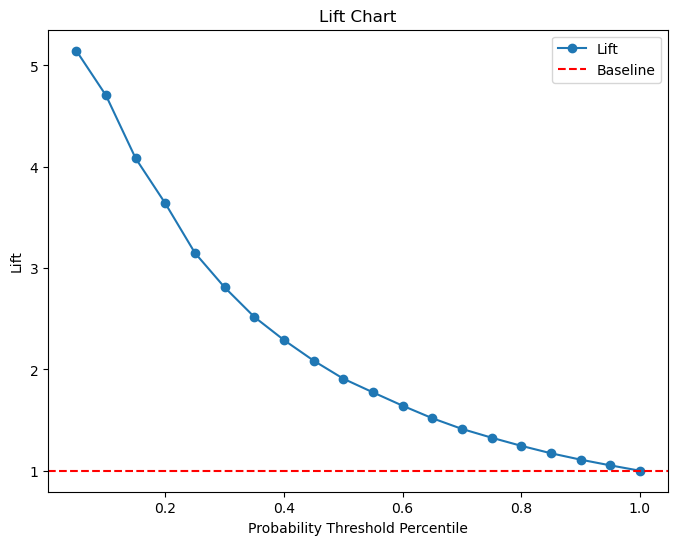

In [335]:
# Lift Chart
plt.figure(figsize=(8,6))
plt.plot(percentile_df['percentile'], percentile_df['lift'], marker='o', label='Lift')
plt.axhline(1, color='red', linestyle='--', label='Baseline')
plt.title('Lift Chart')
plt.xlabel('Probability Threshold Percentile')
plt.ylabel('Lift')
plt.legend()
plt.show()

In [336]:
# Sort by predicted probability (descending)
df_sorted = df6.sort_values(by='pred_prob', ascending=False).reset_index(drop=True)

# Get unique probability thresholds
unique_thresholds = np.sort(df_sorted['pred_prob'].unique())[::-1]  # Descending
# Add extra thresholds for completeness
unique_thresholds = np.append(unique_thresholds, 0)  # Include 0 threshold
unique_thresholds = np.append(1, unique_thresholds)  # Include 1 threshold
unique_thresholds = np.unique(unique_thresholds)

# Calculate total positives and negatives
total_positives = df_sorted['true_value'].sum()
total_negatives = len(df_sorted) - total_positives

# Calculate TPR and FPR for each threshold
tpr_values = []
fpr_values = []
threshold_list = []

for threshold in unique_thresholds:
    # Predict 1 if probability >= threshold
    y_pred = (df_sorted['pred_prob'] >= threshold).astype(int)
    
    # Calculate confusion matrix components
    tp = ((df_sorted['true_value'] == 1) & (y_pred == 1)).sum()
    fp = ((df_sorted['true_value'] == 0) & (y_pred == 1)).sum()
    
    # True Positive Rate (Sensitivity) = TP / (TP + FN) = TP / total_positives
    tpr = tp / total_positives if total_positives > 0 else 0
    
    # False Positive Rate = FP / (FP + TN) = FP / total_negatives
    fpr = fp / total_negatives if total_negatives > 0 else 0
    
    tpr_values.append(tpr)
    fpr_values.append(fpr)
    threshold_list.append(threshold)

# ROC AUC
roc_auc = roc_auc_score(df6['true_value'], df6['pred_prob'])
print(f"AUC: {roc_auc:.6f}")


AUC: 0.886075


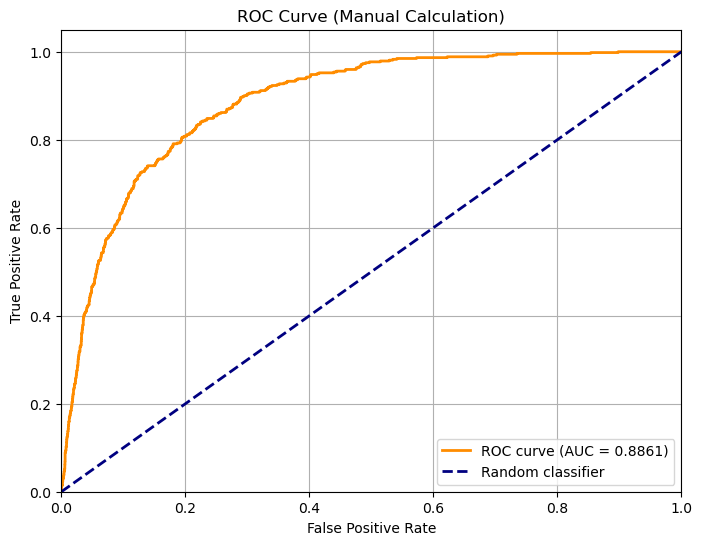

Manual AUC Score: 0.8861


In [337]:
# Plot manual ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Manual Calculation)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Manual AUC Score: {roc_auc:.4f}")

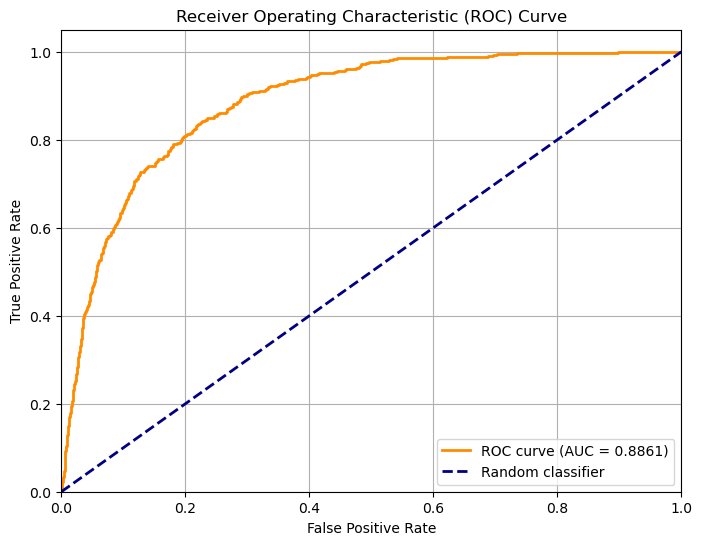

AUC Score: 0.8861


In [338]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(df6['true_value'], df6['pred_prob'])

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(df6['true_value'], df6['pred_prob'])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

In [339]:
# Sort by predicted probability (descending)
df_sorted = df6.sort_values(by='pred_prob', ascending=False).reset_index(drop=True)

# Calculate cumulative distributions
total_positives = df_sorted['true_value'].sum()
total_negatives = len(df_sorted) - total_positives

# Cumulative counts
df_sorted['cum_positive'] = df_sorted['true_value'].cumsum()
df_sorted['cum_negative'] = (1 - df_sorted['true_value']).cumsum()

# Cumulative rates (this is what you want for KS)
df_sorted['cum_positive_rate'] = df_sorted['cum_positive'] / total_positives  # TPR
df_sorted['cum_negative_rate'] = df_sorted['cum_negative'] / total_negatives  # FPR

# KS statistic = max distance between the two curves
df_sorted['ks'] = df_sorted['cum_positive_rate'] - df_sorted['cum_negative_rate']
ks_value = df_sorted['ks'].max()
ks_index = df_sorted['ks'].idxmax()

# Get the KS threshold (probability at max KS)
ks_threshold = df_sorted.loc[ks_index, 'pred_prob']

print(f"KS Statistic: {ks_value:.4f}")
print(f"KS Index: {ks_index}")
print(f"KS Threshold (probability): {ks_threshold:.4f}")

KS Statistic: 0.6159
KS Index: 1336
KS Threshold (probability): 0.1008


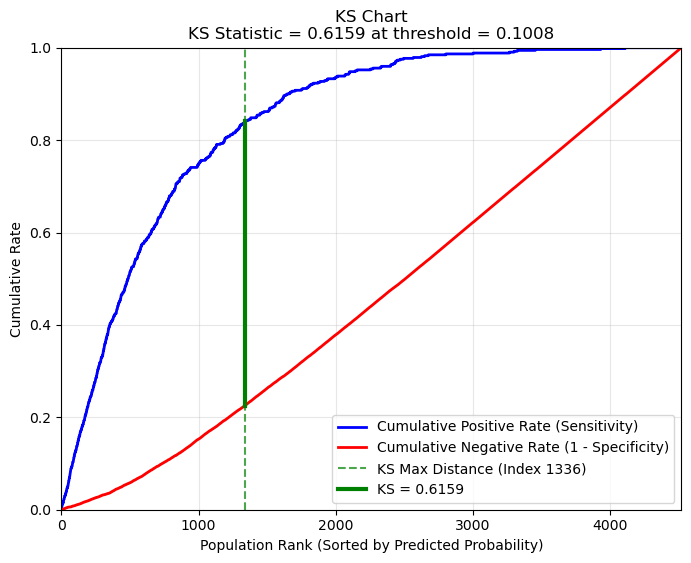

In [340]:
# Plot the KS chart
plt.figure(figsize=(8, 6))

# Plot the two cumulative distribution curves
plt.plot(df_sorted.index, df_sorted['cum_positive_rate'], 
         label='Cumulative Positive Rate (Sensitivity)', color='blue', linewidth=2)
plt.plot(df_sorted.index, df_sorted['cum_negative_rate'], 
         label='Cumulative Negative Rate (1 - Specificity)', color='red', linewidth=2)

# Highlight the maximum KS distance
plt.axvline(x=ks_index, color='green', linestyle='--', alpha=0.7, 
           label=f'KS Max Distance (Index {ks_index})')

# Draw the vertical line showing the KS distance
plt.plot([ks_index, ks_index], 
         [df_sorted.loc[ks_index, 'cum_negative_rate'], 
          df_sorted.loc[ks_index, 'cum_positive_rate']], 
         color='green', linewidth=3, label=f'KS = {ks_value:.4f}')

plt.xlabel('Population Rank (Sorted by Predicted Probability)')
plt.ylabel('Cumulative Rate')
plt.title(f'KS Chart\nKS Statistic = {ks_value:.4f} at threshold = {ks_threshold:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, len(df_sorted))
plt.ylim(0, 1)
plt.show()

### Estimate

In [343]:
# Create a DataFrame to work with
df7 = pd.DataFrame({
    'true_value': y,              # Actual results (0 or 1)
    'pred_prob': pred_model,      # Predicted probabilities (0.0 to 1.0)
})

# Add a column with random probability
np.random.seed(21) 
df7['pred_random'] = np.random.rand(len(df7))

# Mean Squared Error (MSE)
mse_model = mean_squared_error(df7['true_value'], df7['pred_prob'])
mse_random = mean_squared_error(df7['true_value'], df7['pred_random'])

# Root Mean Squared Error (RMSE)
rmse_model = np.sqrt(mse_model)
rmse_random = np.sqrt(mse_random)

# Mean Absolute Error (MAE)
mae_model = mean_absolute_error(df7['true_value'], df7['pred_prob'])
mae_random = mean_absolute_error(df7['true_value'], df7['pred_random'])

# print model results
print("   Error measures from the model:")
print(f"MSE: {mse_model:.4f}")
print(f"RMSE: {rmse_model:.4f}")
print(f"MAE: {mae_model:.4f}")


# print random model results
print("\n   Error measures from the random model:")
print(f"MSE: {mse_random:.4f}")
print(f"RMSE: {rmse_random:.4f}")
print(f"MAE: {mae_random:.4f}")

   Error measures from the model:
MSE: 0.0761
RMSE: 0.2759
MAE: 0.1492

   Error measures from the random model:
MSE: 0.3359
RMSE: 0.5795
MAE: 0.5021


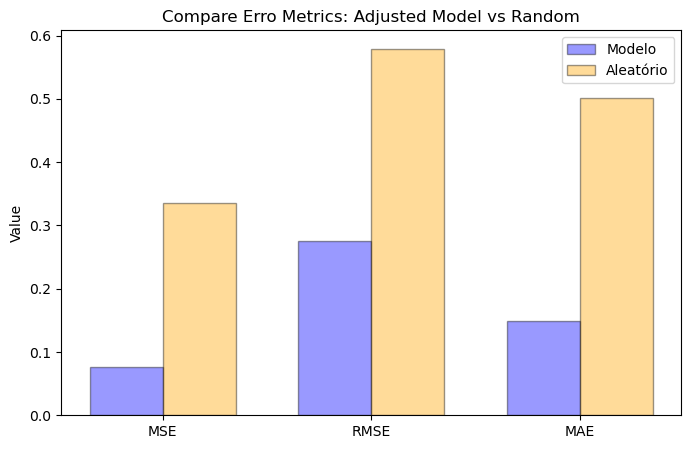

In [354]:
# Model Metrics
metrics = ['MSE', 'RMSE', 'MAE']
model_values = [mse_model, rmse_model, mae_model]
random_values = [mse_random, rmse_random, mae_random]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, model_values, width, label='Modelo', alpha=0.4, color='blue', edgecolor='black')
rects2 = ax.bar(x + width/2, random_values, width, label='Aleatório', alpha=0.4, color='orange', edgecolor='black')

ax.set_ylabel('Value')
ax.set_title('Compare Erro Metrics: Adjusted Model vs Random')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.show()

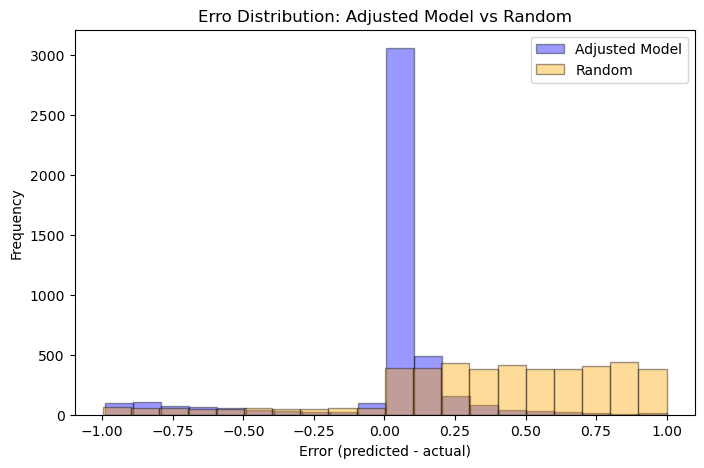

In [352]:
# Calculando os erros
errors_model = df7['pred_prob'] - df7['true_value']
errors_random = df7['pred_random'] - df7['true_value']

plt.figure(figsize=(8,5))
plt.hist(errors_model, bins=20, alpha=0.4, label='Adjusted Model', color='blue', edgecolor='black')
plt.hist(errors_random, bins=20, alpha=0.4, label='Random', color='orange', edgecolor='black')
plt.xlabel('Error (predicted - actual)')
plt.ylabel('Frequency')
plt.title('Erro Distribution: Adjusted Model vs Random')
plt.legend()
plt.show()
